Projekt zaliczeniowy z przedmiotu Zarządzanie informacją w organizacji

Autorzy: Bartłomiej Nowosielski (157483), Piotr Szelest (157503)

Grupa 9

Projekt dotyczy analizy sprzedaży w przedsiębiorstwie XYZ w latach 2009-2016.

Celami przeprowadzonej analizy są m.in.:
    
- Szczegółowa ocena sytuacji panującej na rynku Stanów Zjednoczonych Ameryki Północnej w latach 2009-2016  z podziałem na stany i miasta.
- Analiza wielkości sprzedaży.
- Wskazanie przedziałów czasowych, które generują największe przychody.
- Popularność poszczególnych metod płatności na przestrzeni lat.
- Rozkład sprzedaży w danych terytoriach z uwzględnieniem populacji danego regionu.
- Wizualizacja na mapie z uwzględnieniem wielkości sprzedaży.
- Prognozowanie wskaźników mających wpływ na sprzedaż.

Przeprowadzona analiza może być w szczególności potrzebna dla następujących stanowisk/działów przedsiębiorstwa:
    
- Dział handlowy,
- Magazyn,
- Dział marketingu,
- Dział R&D,
- Dział kadr,
- Dział IT,
- Banki.

W projekcie zostały wykorzystane w mniejszym, bądź większym stopniu następujące tabele:

- orders,
- zipcounty,
- zipcensus,
- customer,
- orderline.

In [1]:
#import wykorzystywanych w projekcie bibliotek

import csv
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
import seaborn as sns
from pandas import DataFrame
%matplotlib inline
import plotly 
import plotly.plotly as py
plotly.tools.set_credentials_file(username='lordpiotr2', api_key='mU300eaFsMkFYYTJ18U7')
import plotly.graph_objs as go
import pylab
from pylab import *
import sklearn
from sklearn import tree, ensemble
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
#Sprawdzamy ścieżkę dostępu do plików wykorzystując tzw. magiczną funkcję.
%pwd

'C:\\Users\\bnowo'

In [3]:
#Przypisanie zmiennej orders odczytanego pliku csv - orders.csv i uwzględnienie separatora, który te dane oddziela.
orders = pd.DataFrame.from_csv('orders.txt', sep='\t',index_col=0)

In [4]:
#Wyświetlenie tabeli orders
orders

,customerid,campaignid,orderdate,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
orderid,,,,,,,,,,
1002854,45978,2141,13.10.2009 00:00,NEWTON,MA,2459,VI,190.00,3,3
1002855,125381,2173,13.10.2009 00:00,NEW ROCHELLE,NY,10804,VI,10.00,1,1
1002856,103122,2141,02.06.2011 00:00,MIAMI,FL,33137,AE,35.22,2,2
1002857,130980,2173,14.10.2009 00:00,E RUTHERFORD,NJ,7073,AE,10.00,1,1
1002886,48553,2141,19.11.2010 00:00,BALTIMORE,MD,21218,VI,10.00,1,1
1002887,106150,2173,15.10.2009 00:00,ROWAYTON,CT,6853,AE,10.00,1,1
1002888,27805,2173,15.10.2009 00:00,INDIANAPO11,IN,46240,VI,10.00,1,1
1002889,24546,2173,15.10.2009 00:00,PLEASANTVILLE,NY,10570,MC,10.00,1,1
1002890,43783,2173,15.10.2009 00:00,EAST STROUDSBURG,PA,18301,DB,29.68,2,2


In [5]:
#Wczytanie i wyświetlenie tabeli zipcensus
zipcensus = pd.DataFrame.from_csv('zipcensus.txt', sep='\t', index_col=0)
zipcensus

,state,population,housingunits,landareameters,waterareameters,landareamiles,waterareamiles,latitude,longitude,numstates,...,hhuofuelnone,hhuoplumbingcomplete,hhuoplumbinglacking,hhumediancashrent,hhunmarried,hhunmarriedmm,hhunmarriedmf,hhunmarriedff,hhunmarriedfm,hhother
zipcode,,,,,,,,,,,,,,,,,,,,,
601,PR,19143,6715,172731389,1082233,66.691965,0.417853,18.180103,-66.749472,1,...,0.622561,0.948771,0.051229,214,0.024936,0.001866,0.010178,0.009839,0.003053,0.978456
602,PR,42042,15590,80137374,0,30.941214,0.000000,18.363285,-67.180247,1,...,0.637648,0.880757,0.119243,233,0.020562,0.003994,0.008506,0.006583,0.001479,0.980104
603,PR,55530,21626,78693011,83181,30.383543,0.032116,18.448619,-67.134224,1,...,0.666979,0.938016,0.061984,154,0.020384,0.001720,0.004744,0.012772,0.001147,0.978104
604,PR,3923,1245,7785336,0,3.005935,0.000000,18.498987,-67.136995,1,...,0.614325,0.996622,0.003378,396,0.040404,0.008264,0.010101,0.000000,0.022039,0.961433
606,PR,6449,2272,94870047,0,36.629531,0.000000,18.182151,-66.958807,1,...,0.621957,0.938820,0.061180,202,0.018381,0.003974,0.008942,0.005464,0.000000,0.982613
610,PR,27975,10566,96017843,668032,37.072698,0.257929,18.288319,-67.136046,1,...,0.688282,0.915469,0.084531,247,0.022119,0.004532,0.007445,0.007769,0.002374,0.977665
612,PR,72730,28754,192519622,2881056,74.332245,1.112382,18.449732,-66.698797,1,...,0.622373,0.935202,0.064798,266,0.021878,0.002440,0.008027,0.008027,0.003384,0.975289
616,PR,10532,4043,40783913,14091,15.746758,0.005441,18.426748,-66.676692,1,...,0.538353,0.894882,0.105118,246,0.020305,0.004512,0.005076,0.005076,0.005640,0.986182
617,PR,23370,8725,55340822,1660753,21.367212,0.641220,18.455499,-66.555758,1,...,0.661204,0.817598,0.182402,249,0.033419,0.002945,0.013060,0.014597,0.002817,0.965941


In [6]:
#Wczytanie i wyświetlenie tabeli zipccounty
zipcounty = pd.DataFrame.from_csv('zipcounty.txt', sep='\t', index_col=0, encoding='latin-1')
zipcounty

,latitude,longitude,poname,zipclass,countyfips,state,countyname,countypop,countyhu,countylandareamiles,countywaterareamiles
zipcode,,,,,,,,,,,
773,18.366028,-65.708138,LUQUILLO,,72089,PR,Luquillo Municipio,19817,9327,25.697733,20.725328
775,18.323736,-65.296471,CULEBRA,P,72049,PR,Culebra Municipio,1868,1024,11.618370,157.207930
777,18.206490,-65.901772,JUNCOS,,72077,PR,Juncos Municipio,36452,13064,26.586044,0.012102
778,18.259092,-65.974640,GURABO,,72063,PR,Gurabo Municipio,36743,12854,27.841166,0.437728
780,18.001995,-66.607430,COTO LAUREL,,72113,PR,Ponce Municipio,186475,66471,114.721200,78.884560
782,18.224958,-66.219887,COMERIO,,72045,PR,Comerío Municipio,20002,7311,28.390432,0.128933
783,18.304369,-66.330528,COROZAL,,72047,PR,Corozal Municipio,36867,12386,42.588402,0.002559
784,17.992290,-66.139252,GUAYAMA,,72057,PR,Guayama Municipio,44301,16368,65.070045,41.740921
785,18.018822,-66.795601,GUAYAMA,P,72059,PR,Guayanilla Municipio,23072,8147,42.361847,21.949371


In [7]:
#Wczytanie i wyświetlenie tabeli customer
customer = pd.DataFrame.from_csv('customer.txt', sep='\t',index_col=0)
customer

,householdid,gender,firstname
customerid,,,
174596,53949999,M,DANIEL
68239,49927024,M,JIM
10203,20914414,F,DONNA
174288,53957047,F,DIONE
68099,49927024,M,JIM
174257,53949983,F,TRISHA
173506,53476818,M,DANTE
51886,20359142,F,ANTHONY
143249,20287377,F,NANCY


In [8]:
#Wyświetlenie indeksów w tabeli orders. 
orders.index

Int64Index([1002854, 1002855, 1002856, 1002857, 1002886, 1002887, 1002888,
            1002889, 1002890, 1003004,
            ...
            1643142, 1643143, 1643144, 1643145, 1643146, 1643147, 1643148,
            1643149, 1643150, 1643157],
           dtype='int64', name='orderid', length=192983)

In [9]:
#Wyświetlenie kolumn, jakie znajdują się w tabeli i ich typu.
orders.columns

Index(['customerid', 'campaignid', 'orderdate', 'city', 'state', 'zipcode',
       'paymenttype', 'totalprice', 'numorderlines', 'numunits'],
      dtype='object')

In [10]:
#Tworzymy nową zmienną o nazwie orders_rozsz, której przypisujemy obiekt DataFrame, który zawiera wcześniej wczytany plik orders oraz trzy nowe kolumny.
orders_rozsz = DataFrame(orders, columns=['customerid', 'campaignid','dzien','miesiac','rok', 'city', 'state', 'zipcode',
       'paymenttype', 'totalprice', 'numorderlines', 'numunits'])
orders_rozsz

,customerid,campaignid,dzien,miesiac,rok,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
orderid,,,,,,,,,,,,
1002854,45978,2141,NaN,NaN,NaN,NEWTON,MA,2459,VI,190.00,3,3
1002855,125381,2173,NaN,NaN,NaN,NEW ROCHELLE,NY,10804,VI,10.00,1,1
1002856,103122,2141,NaN,NaN,NaN,MIAMI,FL,33137,AE,35.22,2,2
1002857,130980,2173,NaN,NaN,NaN,E RUTHERFORD,NJ,7073,AE,10.00,1,1
1002886,48553,2141,NaN,NaN,NaN,BALTIMORE,MD,21218,VI,10.00,1,1
1002887,106150,2173,NaN,NaN,NaN,ROWAYTON,CT,6853,AE,10.00,1,1
1002888,27805,2173,NaN,NaN,NaN,INDIANAPO11,IN,46240,VI,10.00,1,1
1002889,24546,2173,NaN,NaN,NaN,PLEASANTVILLE,NY,10570,MC,10.00,1,1
1002890,43783,2173,NaN,NaN,NaN,EAST STROUDSBURG,PA,18301,DB,29.68,2,2


In [11]:
#Rozdzielenie daty na dni, miesiące i lata. Każda wartość w innej kolumnie.
orders_rozsz['miesiac']= orders.orderdate.str.slice(start=3, stop=5, step=None)
orders_rozsz['dzien']= orders.orderdate.str.slice(start=0, stop=2, step=None)
orders_rozsz['rok']= orders.orderdate.str.slice(start=6, stop=10, step=None)
orders_rozsz

,customerid,campaignid,dzien,miesiac,rok,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
orderid,,,,,,,,,,,,
1002854,45978,2141,13,10,2009,NEWTON,MA,2459,VI,190.00,3,3
1002855,125381,2173,13,10,2009,NEW ROCHELLE,NY,10804,VI,10.00,1,1
1002856,103122,2141,02,06,2011,MIAMI,FL,33137,AE,35.22,2,2
1002857,130980,2173,14,10,2009,E RUTHERFORD,NJ,7073,AE,10.00,1,1
1002886,48553,2141,19,11,2010,BALTIMORE,MD,21218,VI,10.00,1,1
1002887,106150,2173,15,10,2009,ROWAYTON,CT,6853,AE,10.00,1,1
1002888,27805,2173,15,10,2009,INDIANAPO11,IN,46240,VI,10.00,1,1
1002889,24546,2173,15,10,2009,PLEASANTVILLE,NY,10570,MC,10.00,1,1
1002890,43783,2173,15,10,2009,EAST STROUDSBURG,PA,18301,DB,29.68,2,2


In [12]:
#Utworzenie funkcji mającej na celu wybranie dowolnego stanu, który chcemy analizować.
def wyborstanudoanalizy(dane, stan):
    wybrany_stan = dane.loc[dane.state == stan]
    return wybrany_stan

In [13]:
#Wybieramy stan Nowy Jork i wyświetlamy nową tabelę, gdzie będą dane dotyczące tylko wybranego stanu.
NowyJork=wyborstanudoanalizy(orders_rozsz,"NY")
NowyJork

,customerid,campaignid,dzien,miesiac,rok,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits
orderid,,,,,,,,,,,,
1002855,125381,2173,13,10,2009,NEW ROCHELLE,NY,10804,VI,10.00,1,1
1002889,24546,2173,15,10,2009,PLEASANTVILLE,NY,10570,MC,10.00,1,1
1003076,7117,2141,22,11,2010,BROOKLYN,NY,11228,AE,22.05,1,1
1003493,49066,2141,22,11,2010,STATEN ISLAND,NY,10312,MC,34.90,3,3
1003494,103152,2141,22,11,2010,EAST QUOGUE,NY,11942,MC,36.00,1,2
1003495,18815,2173,22,11,2010,NEW YORK,NY,10022,AE,30.00,1,3
1003721,110960,2095,23,11,2010,FLORAL PARK,NY,11001,VI,19.12,1,1
1003722,48793,2173,23,11,2010,ROCHESTER,NY,14607,MC,10.00,1,1
1003723,79549,2173,23,11,2010,EAST MEADOW,NY,11554,VI,24.95,2,2


In [14]:
#Utworzenie funkcji mającej na celu wybranie dowolnego roku, który chcemy analizować.
def wyborroku(dane, rok):
    wybrany_rok = dane.loc[dane.rok == rok]
    return wybrany_rok

In [15]:
#Wybieramy lata od 2009 do 2016 i przypisujemy im zmienne, które posłużą nam w następnym kroku.
rok2009=wyborroku(NowyJork, "2009")
rok2010=wyborroku(NowyJork, "2010")
rok2011=wyborroku(NowyJork, "2011")
rok2012=wyborroku(NowyJork, "2012")
rok2013=wyborroku(NowyJork, "2013")
rok2014=wyborroku(NowyJork, "2014")
rok2015=wyborroku(NowyJork, "2015")
rok2016=wyborroku(NowyJork, "2016")

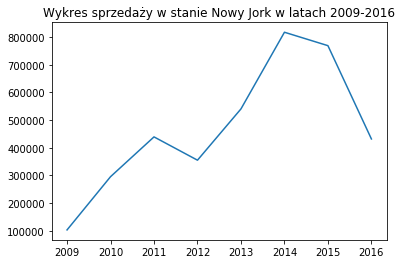

In [16]:
#Rysujemy wykres, na którym będzie przedstawiona suma sprzedazy w stanie Nowy Jork w latach 2009-2016.
plot((2009,2010,2011,2012,2013,2014,2015,2016), 
     (sum(rok2009["totalprice"]),
sum(rok2010["totalprice"]),
sum(rok2011["totalprice"]),
sum(rok2012["totalprice"]),
sum(rok2013["totalprice"]),
sum(rok2014["totalprice"]),
sum(rok2015["totalprice"]),
sum(rok2016["totalprice"])))
plt.title('Wykres sprzedaży w stanie Nowy Jork w latach 2009-2016')
plt.figure(figsize=(15, 15), dpi=80)
plt.show()

In [17]:
#W celu jeszcze lepszego zawężenia danych do analizy tworzymy kolejną funkcję. Ta będzie pozwalała na wybór miasta, które chcemy zbadać.
def wybormaiastadoanalizy(dane, miasto):
    wybrane_miasto = dane.loc[dane.city == miasto]
    return wybrane_miasto

In [18]:
#przypisanie do zmiennej nowe_miasto wartości wywołania funkcji dla NEW YORK. Przykładowe zastosowanie.
nowe_miasto=wybormaiastadoanalizy(orders_rozsz,"NEW YORK")

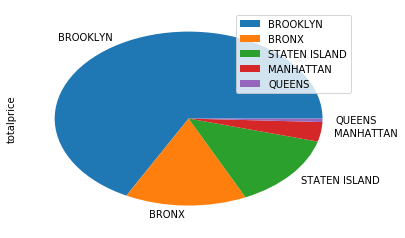

In [19]:
#Powyższe czynności można wykonać szybciej.
#Na podstawie grupowania wybieramy z tabeli NowyJork miasta i sortujemy je wg wartości zamówień. Następnie wyświetlamy wykres kołowy,
#który przedstawia udział poszczególnych dzielnic w sprzedaży.

miasto1 = NowyJork.groupby(['city'],as_index=False).sum()
miasto2 = miasto1.sort_values(by=['totalprice'], ascending=False).round()
miasto3 = ['MANHATTAN','BRONX','BROOKLYN','QUEENS','STATEN ISLAND']
miasto4 = miasto2.loc[miasto2.city.isin(miasto3)]
miasto5 = miasto4[['city','totalprice']]

miasto6 = miasto5.set_index(['city'])
miasto6.plot.pie(y="totalprice")

In [20]:
#Kolejna funkcja służy do wybrania miesiąca do analiz. 
def wybormiesiaca(dane, miesiac):
    wybrany_miesiac = dane.loc[dane.miesiac == miesiac]
    return wybrany_miesiac

In [21]:
#Przypisujemy zmiennym wartości wywołania funkcji dla każdego roku i miesiąca.
sty09=wybormiesiaca(rok2009, '01')
lut09=wybormiesiaca(rok2009, '02')
mar09=wybormiesiaca(rok2009, '03')
kwi09=wybormiesiaca(rok2009, '04')
maj09=wybormiesiaca(rok2009, '05')
cze09=wybormiesiaca(rok2009, '06')
lip09=wybormiesiaca(rok2009, '07')
sie09=wybormiesiaca(rok2009, '08')
wrz09=wybormiesiaca(rok2009, '09')
paz09=wybormiesiaca(rok2009, '10')
lis09=wybormiesiaca(rok2009, '11')
gru09=wybormiesiaca(rok2009, '12')

sty10=wybormiesiaca(rok2010, '01')
lut10=wybormiesiaca(rok2010, '02')
mar10=wybormiesiaca(rok2010, '03')
kwi10=wybormiesiaca(rok2010, '04')
maj10=wybormiesiaca(rok2010, '05')
cze10=wybormiesiaca(rok2010, '06')
lip10=wybormiesiaca(rok2010, '07')
sie10=wybormiesiaca(rok2010, '08')
wrz10=wybormiesiaca(rok2010, '09')
paz10=wybormiesiaca(rok2010, '10')
lis10=wybormiesiaca(rok2010, '11')
gru10=wybormiesiaca(rok2010, '12')

sty11=wybormiesiaca(rok2011, '01')
lut11=wybormiesiaca(rok2011, '02')
mar11=wybormiesiaca(rok2011, '03')
kwi11=wybormiesiaca(rok2011, '04')
maj11=wybormiesiaca(rok2011, '05')
cze11=wybormiesiaca(rok2011, '06')
lip11=wybormiesiaca(rok2011, '07')
sie11=wybormiesiaca(rok2011, '08')
wrz11=wybormiesiaca(rok2011, '09')
paz11=wybormiesiaca(rok2011, '10')
lis11=wybormiesiaca(rok2011, '11')
gru11=wybormiesiaca(rok2011, '12')

sty12=wybormiesiaca(rok2012, '01')
lut12=wybormiesiaca(rok2012, '02')
mar12=wybormiesiaca(rok2012, '03')
kwi12=wybormiesiaca(rok2012, '04')
maj12=wybormiesiaca(rok2012, '05')
cze12=wybormiesiaca(rok2012, '06')
lip12=wybormiesiaca(rok2012, '07')
sie12=wybormiesiaca(rok2012, '08')
wrz12=wybormiesiaca(rok2012, '09')
paz12=wybormiesiaca(rok2012, '10')
lis12=wybormiesiaca(rok2012, '11')
gru12=wybormiesiaca(rok2012, '12')

sty13=wybormiesiaca(rok2013, '01')
lut13=wybormiesiaca(rok2013, '02')
mar13=wybormiesiaca(rok2013, '03')
kwi13=wybormiesiaca(rok2013, '04')
maj13=wybormiesiaca(rok2013, '05')
cze13=wybormiesiaca(rok2013, '06')
lip13=wybormiesiaca(rok2013, '07')
sie13=wybormiesiaca(rok2013, '08')
wrz13=wybormiesiaca(rok2013, '09')
paz13=wybormiesiaca(rok2013, '10')
lis13=wybormiesiaca(rok2013, '11')
gru13=wybormiesiaca(rok2013, '12')

sty14=wybormiesiaca(rok2014, '01')
lut14=wybormiesiaca(rok2014, '02')
mar14=wybormiesiaca(rok2014, '03')
kwi14=wybormiesiaca(rok2014, '04')
maj14=wybormiesiaca(rok2014, '05')
cze14=wybormiesiaca(rok2014, '06')
lip14=wybormiesiaca(rok2014, '07')
sie14=wybormiesiaca(rok2014, '08')
wrz14=wybormiesiaca(rok2014, '09')
paz14=wybormiesiaca(rok2014, '10')
lis14=wybormiesiaca(rok2014, '11')
gru14=wybormiesiaca(rok2014, '12')

sty15=wybormiesiaca(rok2015, '01')
lut15=wybormiesiaca(rok2015, '02')
mar15=wybormiesiaca(rok2015, '03')
kwi15=wybormiesiaca(rok2015, '04')
maj15=wybormiesiaca(rok2015, '05')
cze15=wybormiesiaca(rok2015, '06')
lip15=wybormiesiaca(rok2015, '07')
sie15=wybormiesiaca(rok2015, '08')
wrz15=wybormiesiaca(rok2015, '09')
paz15=wybormiesiaca(rok2015, '10')
lis15=wybormiesiaca(rok2015, '11')
gru15=wybormiesiaca(rok2015, '12')

sty16=wybormiesiaca(rok2016, '01')
lut16=wybormiesiaca(rok2016, '02')
mar16=wybormiesiaca(rok2016, '03')
kwi16=wybormiesiaca(rok2016, '04')
maj16=wybormiesiaca(rok2016, '05')
cze16=wybormiesiaca(rok2016, '06')
lip16=wybormiesiaca(rok2016, '07')
sie16=wybormiesiaca(rok2016, '08')
wrz16=wybormiesiaca(rok2016, '09')
paz16=wybormiesiaca(rok2016, '10')
lis16=wybormiesiaca(rok2016, '11')
gru16=wybormiesiaca(rok2016, '12')

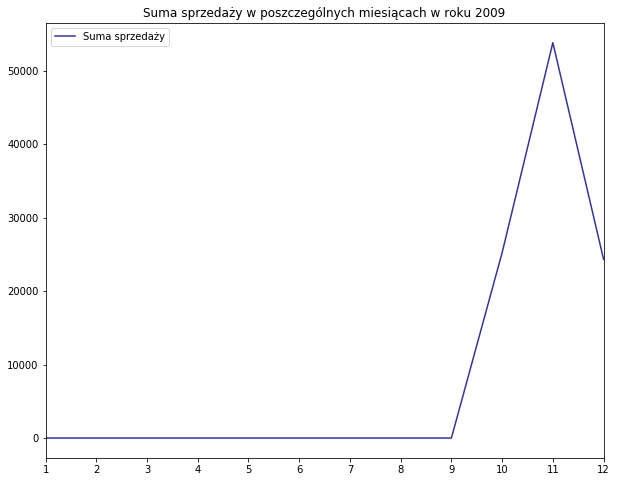

In [22]:
#Tworzymy nowy wykres sprzedaży w roku 2009. 
#Jak można spostrzec na wykresie zaczyna się ona od września 2009, gdyż wcześniej przedsiębiorstwo prawdpodobnie jeszcze nie funkcjonowało.
db09 = pd.DataFrame({
    "Suma sprzedaży": [15000,sum(sty09["totalprice"]),
                                  sum(lut09["totalprice"]),
                                  sum(mar09["totalprice"]),
                                  sum(kwi09["totalprice"]),
                                  sum(maj09["totalprice"]),
                                  sum(cze09["totalprice"]),
                                  sum(lip09["totalprice"]),
                                  sum(sie09["totalprice"]),
                                  sum(wrz09["totalprice"]),
                                  sum(paz09["totalprice"]),
                                  sum(lis09["totalprice"]),
                                  sum(gru09["totalprice"])]
})
plt.figure();
db09.plot(title="Suma sprzedaży w poszczególnych miesiącach w roku 2009",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12),xlim=1, colormap='terrain')

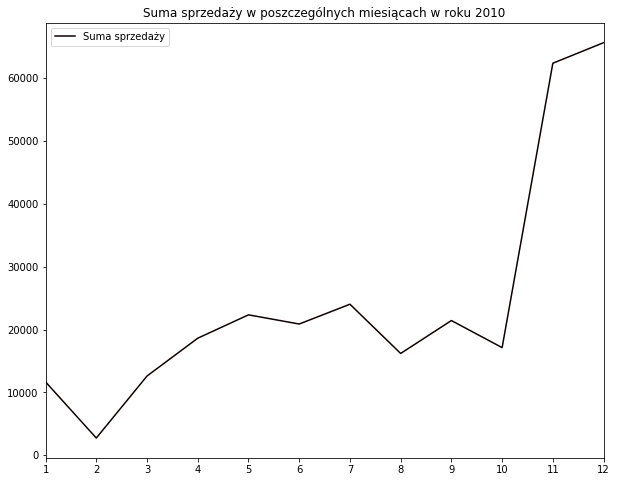

In [23]:
#Tworzymy nowy wykres sprzedaży w roku 2010. 
db10 = pd.DataFrame({
    "Suma sprzedaży": [15000,sum(sty10["totalprice"]),
                                  sum(lut10["totalprice"]),
                                  sum(mar10["totalprice"]),
                                  sum(kwi10["totalprice"]),
                                  sum(maj10["totalprice"]),
                                  sum(cze10["totalprice"]),
                                  sum(lip10["totalprice"]),
                                  sum(sie10["totalprice"]),
                                  sum(wrz10["totalprice"]),
                                  sum(paz10["totalprice"]),
                                  sum(lis10["totalprice"]),
                                  sum(gru10["totalprice"])]
})
plt.figure();
db10.plot(title="Suma sprzedaży w poszczególnych miesiącach w roku 2010",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12),xlim=1, colormap='hot')

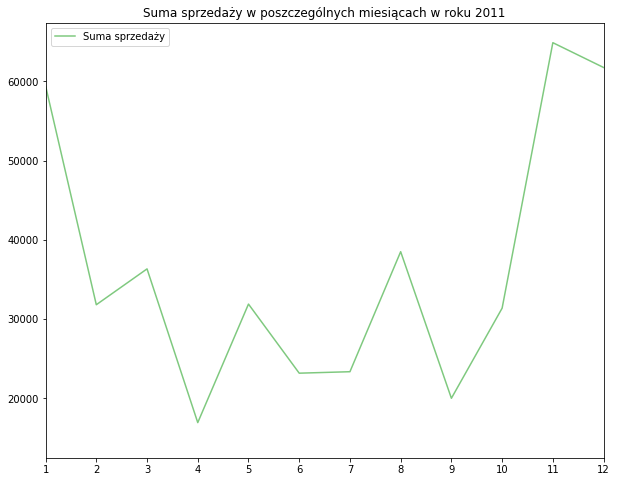

In [24]:
#Tworzymy nowy wykres sprzedaży w roku 2011. 
db11 = pd.DataFrame({
    "Suma sprzedaży": [15000, sum(sty11["totalprice"]),
                                  sum(lut11["totalprice"]),
                                  sum(mar11["totalprice"]),
                                  sum(kwi11["totalprice"]),
                                  sum(maj11["totalprice"]),
                                  sum(cze11["totalprice"]),
                                  sum(lip11["totalprice"]),
                                  sum(sie11["totalprice"]),
                                  sum(wrz11["totalprice"]),
                                  sum(paz11["totalprice"]),
                                  sum(lis11["totalprice"]),
                                  sum(gru11["totalprice"])]
})
plt.figure();
db11.plot(title="Suma sprzedaży w poszczególnych miesiącach w roku 2011",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12), xlim=1, colormap='Accent')

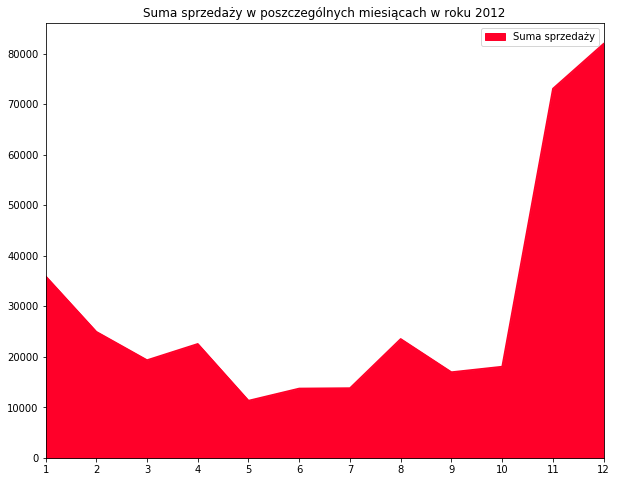

In [25]:
#Tworzymy nowy wykres sprzedaży w roku 2012. 
db12 = pd.DataFrame({
    "Suma sprzedaży": [15000,sum(sty12["totalprice"]),
                                  sum(lut12["totalprice"]),
                                  sum(mar12["totalprice"]),
                                  sum(kwi12["totalprice"]),
                                  sum(maj12["totalprice"]),
                                  sum(cze12["totalprice"]),
                                  sum(lip12["totalprice"]),
                                  sum(sie12["totalprice"]),
                                  sum(wrz12["totalprice"]),
                                  sum(paz12["totalprice"]),
                                  sum(lis12["totalprice"]),
                                  sum(gru12["totalprice"])]
})
plt.figure();
db12.plot(kind='area',title="Suma sprzedaży w poszczególnych miesiącach w roku 2012",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12),xlim=1,colormap='gist_rainbow')

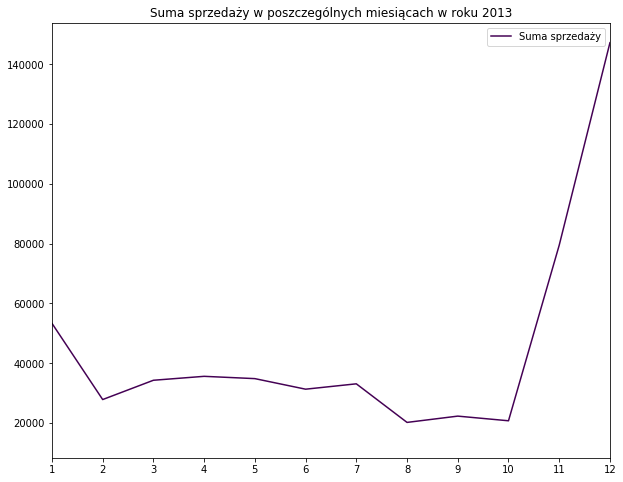

In [26]:
#Tworzymy nowy wykres sprzedaży w roku 2013. 
db13 = pd.DataFrame({
    "Suma sprzedaży": [15000,sum(sty13["totalprice"]),
                                  sum(lut13["totalprice"]),
                                  sum(mar13["totalprice"]),
                                  sum(kwi13["totalprice"]),
                                  sum(maj13["totalprice"]),
                                  sum(cze13["totalprice"]),
                                  sum(lip13["totalprice"]),
                                  sum(sie13["totalprice"]),
                                  sum(wrz13["totalprice"]),
                                  sum(paz13["totalprice"]),
                                  sum(lis13["totalprice"]),
                                  sum(gru13["totalprice"])]
})
plt.figure();
db13.plot(title="Suma sprzedaży w poszczególnych miesiącach w roku 2013",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12),xlim=1, colormap='viridis')

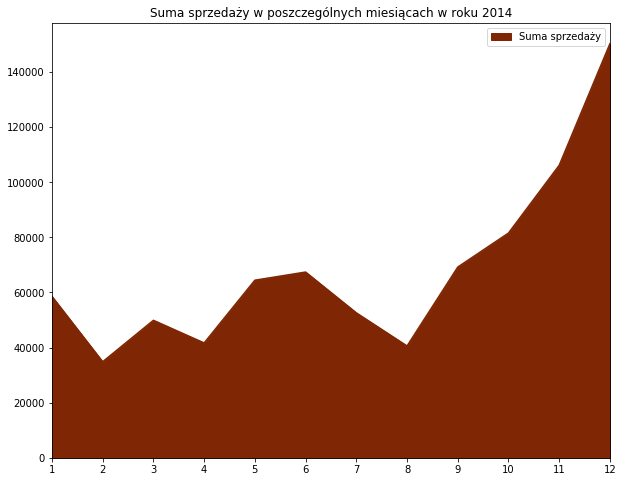

In [27]:
#Tworzymy nowy wykres sprzedaży w roku 2014. 
db14 = pd.DataFrame({
    "Suma sprzedaży": [15000,sum(sty14["totalprice"]),
                                  sum(lut14["totalprice"]),
                                  sum(mar14["totalprice"]),
                                  sum(kwi14["totalprice"]),
                                  sum(maj14["totalprice"]),
                                  sum(cze14["totalprice"]),
                                  sum(lip14["totalprice"]),
                                  sum(sie14["totalprice"]),
                                  sum(wrz14["totalprice"]),
                                  sum(paz14["totalprice"]),
                                  sum(lis14["totalprice"]),
                                  sum(gru14["totalprice"])]
})
plt.figure();
db14.plot(kind='area',title="Suma sprzedaży w poszczególnych miesiącach w roku 2014",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12),xlim=1, colormap='Oranges_r')

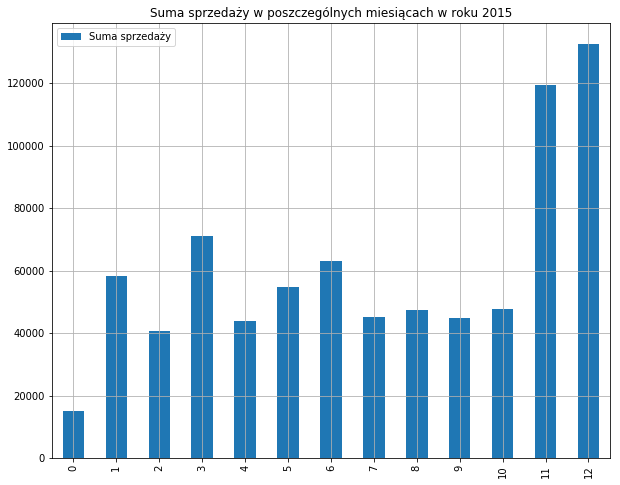

In [28]:
#Tworzymy nowy wykres sprzedaży w roku 2015. 
db15 = pd.DataFrame({
    "Suma sprzedaży": [15000,sum(sty15["totalprice"]),
                                  sum(lut15["totalprice"]),
                                  sum(mar15["totalprice"]),
                                  sum(kwi15["totalprice"]),
                                  sum(maj15["totalprice"]),
                                  sum(cze15["totalprice"]),
                                  sum(lip15["totalprice"]),
                                  sum(sie15["totalprice"]),
                                  sum(wrz15["totalprice"]),
                                  sum(paz15["totalprice"]),
                                  sum(lis15["totalprice"]),
                                  sum(gru15["totalprice"])]
})
plt.figure();
db15.plot(kind='bar',grid='true',title="Suma sprzedaży w poszczególnych miesiącach w roku 2015",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12), xlim=1)

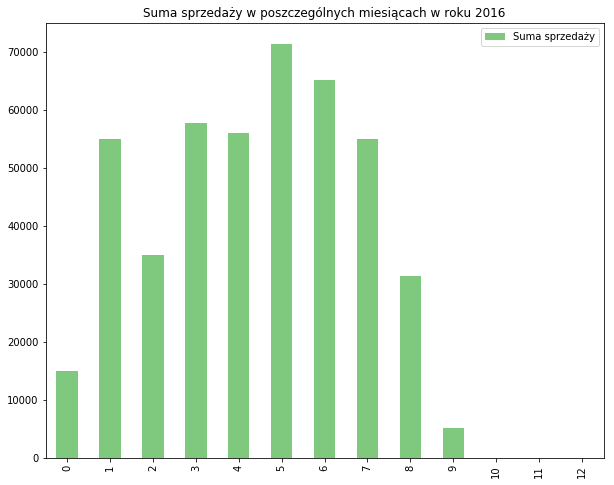

In [29]:
#Tworzymy nowy wykres sprzedaży w roku 2016. Posiadane dane kończą się we wrześniu 2016 roku.
db16 = pd.DataFrame({
    "Suma sprzedaży": [15000, sum(sty16["totalprice"]),
                                  sum(lut16["totalprice"]),
                                  sum(mar16["totalprice"]),
                                  sum(kwi16["totalprice"]),
                                  sum(maj16["totalprice"]),
                                  sum(cze16["totalprice"]),
                                  sum(lip16["totalprice"]),
                                  sum(sie16["totalprice"]),
                                  sum(wrz16["totalprice"]),
                                  sum(paz16["totalprice"]),
                                  sum(lis16["totalprice"]),
                                  sum(gru16["totalprice"])]
})
plt.figure();
db16.plot(kind='bar', title="Suma sprzedaży w poszczególnych miesiącach w roku 2016",figsize=(10,8),xticks=(1,2,3,4,5,6,7,8,9,10,11,12), xlim=1, colormap='Accent')

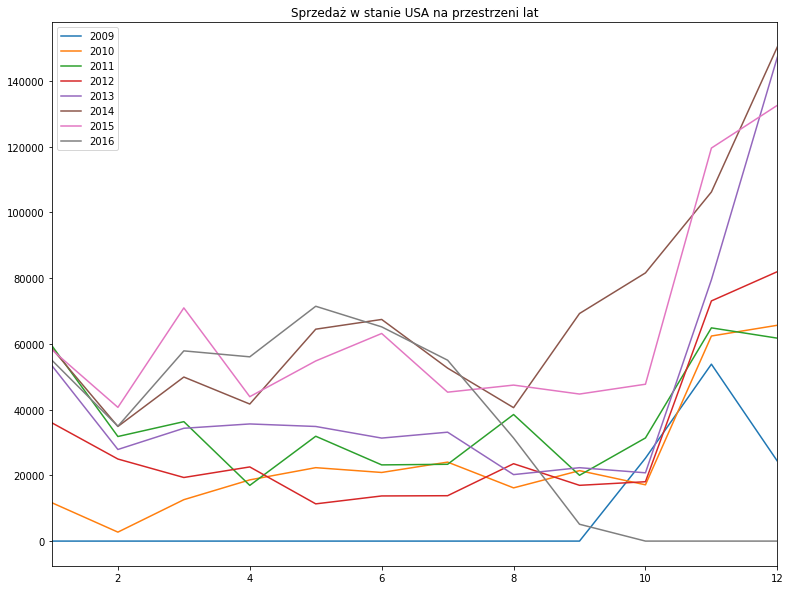

In [30]:
# A teraz tworzymy wykres łączny dla wszystkich lat jednocześnie.
dfALL = pd.DataFrame({
    "2009": [sum(sty09["totalprice"]),
                                  sum(lut09["totalprice"]),
                                  sum(mar09["totalprice"]),
                                  sum(kwi09["totalprice"]),
                                  sum(maj09["totalprice"]),
                                  sum(cze09["totalprice"]),
                                  sum(lip09["totalprice"]),
                                  sum(sie09["totalprice"]),
                                  sum(wrz09["totalprice"]),
                                  sum(paz09["totalprice"]),
                                  sum(lis09["totalprice"]),
                                  sum(gru09["totalprice"])],
    "2010": [sum(sty10["totalprice"]),
                                  sum(lut10["totalprice"]),
                                  sum(mar10["totalprice"]),
                                  sum(kwi10["totalprice"]),
                                  sum(maj10["totalprice"]),
                                  sum(cze10["totalprice"]),
                                  sum(lip10["totalprice"]),
                                  sum(sie10["totalprice"]),
                                  sum(wrz10["totalprice"]),
                                  sum(paz10["totalprice"]),
                                  sum(lis10["totalprice"]),
                                  sum(gru10["totalprice"])],
    "2011": [sum(sty11["totalprice"]),
                                  sum(lut11["totalprice"]),
                                  sum(mar11["totalprice"]),
                                  sum(kwi11["totalprice"]),
                                  sum(maj11["totalprice"]),
                                  sum(cze11["totalprice"]),
                                  sum(lip11["totalprice"]),
                                  sum(sie11["totalprice"]),
                                  sum(wrz11["totalprice"]),
                                  sum(paz11["totalprice"]),
                                  sum(lis11["totalprice"]),
                                  sum(gru11["totalprice"])],
    "2012": [sum(sty12["totalprice"]),
                                  sum(lut12["totalprice"]),
                                  sum(mar12["totalprice"]),
                                  sum(kwi12["totalprice"]),
                                  sum(maj12["totalprice"]),
                                  sum(cze12["totalprice"]),
                                  sum(lip12["totalprice"]),
                                  sum(sie12["totalprice"]),
                                  sum(wrz12["totalprice"]),
                                  sum(paz12["totalprice"]),
                                  sum(lis12["totalprice"]),
                                  sum(gru12["totalprice"])],
     "2013": [sum(sty13["totalprice"]),
                                  sum(lut13["totalprice"]),
                                  sum(mar13["totalprice"]),
                                  sum(kwi13["totalprice"]),
                                  sum(maj13["totalprice"]),
                                  sum(cze13["totalprice"]),
                                  sum(lip13["totalprice"]),
                                  sum(sie13["totalprice"]),
                                  sum(wrz13["totalprice"]),
                                  sum(paz13["totalprice"]),
                                  sum(lis13["totalprice"]),
                                  sum(gru13["totalprice"])],
     "2014": [sum(sty14["totalprice"]),
                                  sum(lut14["totalprice"]),
                                  sum(mar14["totalprice"]),
                                  sum(kwi14["totalprice"]),
                                  sum(maj14["totalprice"]),
                                  sum(cze14["totalprice"]),
                                  sum(lip14["totalprice"]),
                                  sum(sie14["totalprice"]),
                                  sum(wrz14["totalprice"]),
                                  sum(paz14["totalprice"]),
                                  sum(lis14["totalprice"]),
                                  sum(gru14["totalprice"])],
     "2015": [sum(sty15["totalprice"]),
                                  sum(lut15["totalprice"]),
                                  sum(mar15["totalprice"]),
                                  sum(kwi15["totalprice"]),
                                  sum(maj15["totalprice"]),
                                  sum(cze15["totalprice"]),
                                  sum(lip15["totalprice"]),
                                  sum(sie15["totalprice"]),
                                  sum(wrz15["totalprice"]),
                                  sum(paz15["totalprice"]),
                                  sum(lis15["totalprice"]),
                                  sum(gru15["totalprice"])],
     "2016": [sum(sty16["totalprice"]),
                                  sum(lut16["totalprice"]),
                                  sum(mar16["totalprice"]),
                                  sum(kwi16["totalprice"]),
                                  sum(maj16["totalprice"]),
                                  sum(cze16["totalprice"]),
                                  sum(lip16["totalprice"]),
                                  sum(sie16["totalprice"]),
                                  sum(wrz16["totalprice"]),
                                  sum(paz16["totalprice"]),
                                  sum(lis16["totalprice"]),
                                  sum(gru16["totalprice"])],
}, [1,2,3,4,5,6,7,8,9,10,11,12])
   

plt.figure();
dfALL.plot(title="Sprzedaż w stanie USA na przestrzeni lat",figsize=(13,10));

In [31]:
#Definiujemy funkcję, która pozwoli na wybranie metody płatności do badania.
def wybormetody(dane, metoda):
    wybrana_metoda = dane.loc[dane.paymenttype == metoda]
    return wybrana_metoda

In [32]:
#Przypisujemy zmienną wyniki wywołania funkcji dla każdej metody płatności w roku 2011.
#Aby obliczyć ile rekordów dotyczy danej metody płatności wykorzystujemy następnie funkcję len.
DB= wybormetody(rok2011,"DB")
MC= wybormetody(rok2011,"MC")
AE= wybormetody(rok2011,"AE")
VI = wybormetody(rok2011,'VI')
OC = wybormetody(rok2011,'OC')

ileDB=len(DB)
ileMC=len(MC)
ileAE=len(AE)
ileVI=len(VI)
ileOC=len(OC)

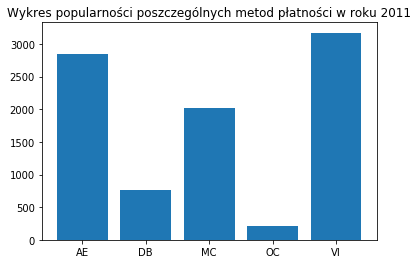

In [33]:
#Rysujemy wykres, gdzie x to poszczególne metody płatnosci, a y to ilość ich wystąpień w danym roku.
x=['OC','VI','AE','MC','DB']
y=[ileOC,ileVI,ileAE,ileMC,ileDB]

plt.bar(x,y)
plt.title('Wykres popularności poszczególnych metod płatności w roku 2011')
plt.figure(figsize=(15, 15), dpi=80)
plt.show()

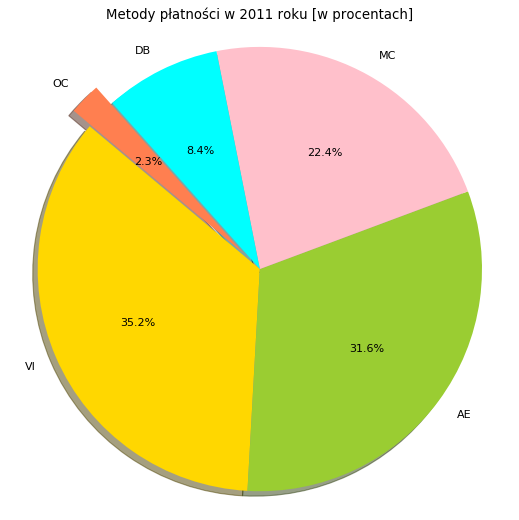

In [34]:
#Kolejny wykres przedstawia udział procentowy poszczególnych metod płatności w roku 2011.
labels = 'VI','AE','MC','DB','OC'
sizes = [ileVI,ileAE,ileMC,ileDB,ileOC]
colors = ['gold', 'yellowgreen','pink','cyan','coral']
explode = (0, 0, 0, 0, 0.1) 

plt.figure(figsize=(8, 8), dpi=80)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Metody płatności w 2011 roku [w procentach]')
plt.show()

In [35]:
#Przypisujemy zmiennym liczbę wystąpień danej metody płatności w każdym roku. 
p1 = orders_rozsz.loc[orders_rozsz.rok == "2009"]
p2 = orders_rozsz.loc[orders_rozsz.rok == "2010"]
p3 = orders_rozsz.loc[orders_rozsz.rok == "2011"]
p4 = orders_rozsz.loc[orders_rozsz.rok == "2012"]
p5 = orders_rozsz.loc[orders_rozsz.rok == "2013"]
p6 = orders_rozsz.loc[orders_rozsz.rok == "2014"]
p7 = orders_rozsz.loc[orders_rozsz.rok == "2015"]
p8 = orders_rozsz.loc[orders_rozsz.rok == "2016"]

r1 = p1.paymenttype.str.count("AE")
r2 = p1.paymenttype.str.count("VI")
r3 = p1.paymenttype.str.count("MC")
r4 = p1.paymenttype.str.count("DB")
r5 = p1.paymenttype.str.count("OC")

t1 = p2.paymenttype.str.count("AE")
t2 = p2.paymenttype.str.count("VI")
t3 = p2.paymenttype.str.count("MC")
t4 = p2.paymenttype.str.count("DB")
t5 = p2.paymenttype.str.count("OC")

y1 = p3.paymenttype.str.count("AE")
y2 = p3.paymenttype.str.count("VI")
y3 = p3.paymenttype.str.count("MC")
y4 = p3.paymenttype.str.count("DB")
y5 = p3.paymenttype.str.count("OC")

u1 = p4.paymenttype.str.count("AE")
u2 = p4.paymenttype.str.count("VI")
u3 = p4.paymenttype.str.count("MC")
u4 = p4.paymenttype.str.count("DB")
u5 = p4.paymenttype.str.count("OC")

i1 = p5.paymenttype.str.count("AE")
i2 = p5.paymenttype.str.count("VI")
i3 = p5.paymenttype.str.count("MC")
i4 = p5.paymenttype.str.count("DB")
i5 = p5.paymenttype.str.count("OC")

f1 = p6.paymenttype.str.count("AE")
f2 = p6.paymenttype.str.count("VI")
f3 = p6.paymenttype.str.count("MC")
f4 = p6.paymenttype.str.count("DB")
f5 = p6.paymenttype.str.count("OC")

g1 = p7.paymenttype.str.count("AE")
g2 = p7.paymenttype.str.count("VI")
g3 = p7.paymenttype.str.count("MC")
g4 = p7.paymenttype.str.count("DB")
g5 = p7.paymenttype.str.count("OC")

h1 = p8.paymenttype.str.count("AE")
h2 = p8.paymenttype.str.count("VI")
h3 = p8.paymenttype.str.count("MC")
h4 = p8.paymenttype.str.count("DB")
h5 = p8.paymenttype.str.count("OC")



d0 = orders_rozsz.paymenttype.str.count("AE")
d1 = orders_rozsz.paymenttype.str.count("VI")
d2 = orders_rozsz.paymenttype.str.count("MC")
d3 = orders_rozsz.paymenttype.str.count("DB")
d4 = orders_rozsz.paymenttype.str.count("OC")
ddd =sum(d0)+sum(d1)+sum(d2)+sum(d3)+sum(d4)


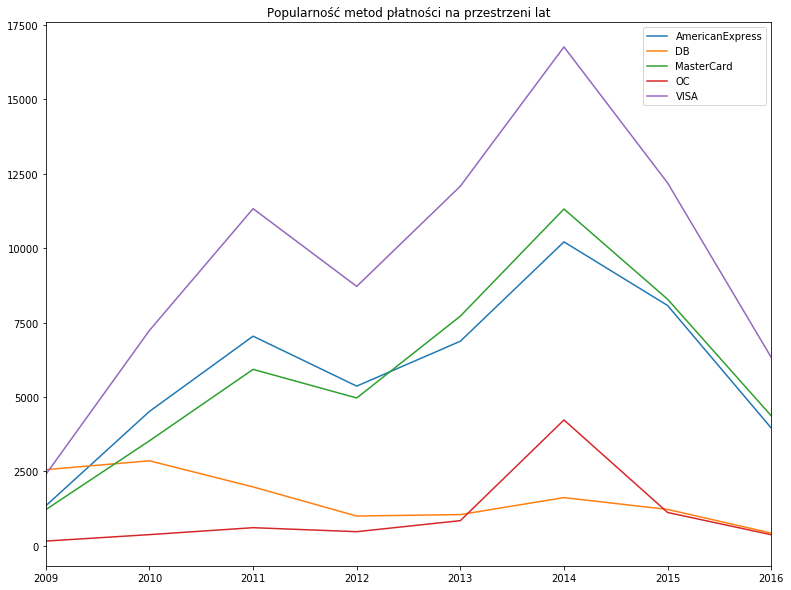

In [36]:
#Tworzymy nowy wykres, który to obrazuje popularność metod płatnosci w latach 2009-2016
df = pd.DataFrame({
    "AmericanExpress": [sum(r1),sum(t1),sum(y1),sum(u1),sum(i1),sum(f1),sum(g1),sum(h1)],
    "VISA": [sum(r2),sum(t2),sum(y2),sum(u2),sum(i2),sum(f2),sum(g2),sum(h2)],
    "MasterCard": [sum(r3),sum(t3),sum(y3),sum(u3),sum(i3),sum(f3),sum(g3),sum(h3)],
    "DB": [sum(r4),sum(t4),sum(y4),sum(u4),sum(i4),sum(f4),sum(g4),sum(h4)],
    "OC": [sum(r5),sum(t5),sum(y5),sum(u5),sum(i5),sum(f5),sum(g5),sum(h5)],  
}, [2009,2010,2011,2012,2013,2014,2015,2016])
   

plt.figure();
df.plot(title="Popularność metod płatności na przestrzeni lat",figsize=(13,10));

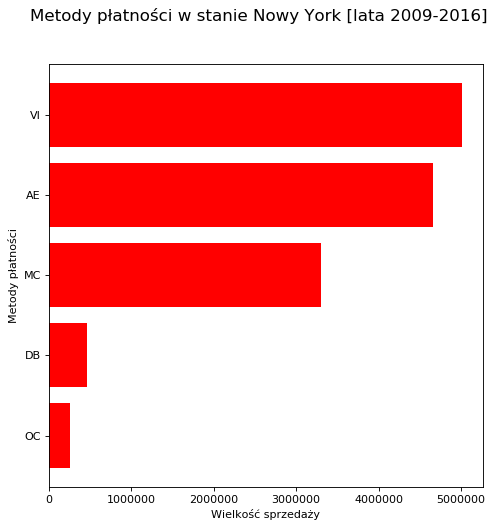

In [37]:
#Kolejny wykres pokazuje nam popularność metod płatności w stanie Nowy Jork w latach 2009-2016
mp = ['NY']
mp1 = orders_rozsz.loc[orders_rozsz.state.isin(mp)]
mp2 = orders_rozsz.groupby(['paymenttype'],as_index=False).sum()
mp3 = mp2.sort_values(by=['totalprice'], ascending=True).round()
mp4 = mp3[['paymenttype','totalprice']]
mp5 = mp4[1:6]
mp5

plt.figure(figsize=(7, 7), dpi=80)
#stworzenie kopii tabeli z wybranymi kolumnami
objects = mp5['paymenttype']
y_pos = np.arange(len(objects))
#wybranie danych
values = mp5['totalprice']
#przypisanie danych do tabeli
plt.barh(y_pos, values, align='center', color="red")
plt.yticks(y_pos, objects)
#dodatnie tytułu i podpisów
plt.suptitle('Metody płatności w stanie Nowy York [lata 2009-2016]', fontsize=15)
plt.xlabel('Wielkość sprzedaży')
plt.ylabel('Metody płatności',fontsize=10)
#wyświetlenie wykresu
plt.figure(figsize=(13, 13), dpi=80)
plt.show()

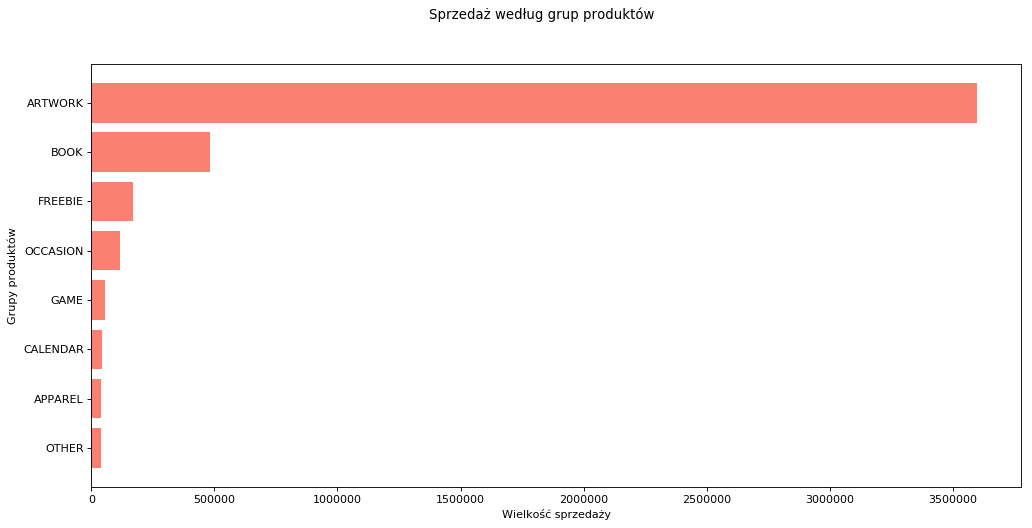

In [38]:
#Następny wykres dotyczy sprzedaży według grup produktów w mieście Nowy Jork.
Orderline = pd.DataFrame.from_csv('orderline.txt', sep='\t',index_col=0)
Products = pd.DataFrame.from_csv('product.txt', sep='\t',index_col=0)
OrderlineProducts = Orderline.join(Products, on='productid')
OrderlineOrdersProducts = OrderlineProducts.join(orders_rozsz, on='orderid', how='left', lsuffix='_left', rsuffix='_right')

pk = ['NY']
pk1 = OrderlineOrdersProducts.loc[OrderlineOrdersProducts.state.isin(pk)]
pk2 = pk1[['city','totalprice_right','PRODUCTGROUPNAME']]

pk3 = pk2.sort_values(by=['totalprice_right'], ascending=False)
pk4 = pk3.groupby(['city','PRODUCTGROUPNAME'],as_index=False).sum()
pk5 = pk4.sort_values(by=['totalprice_right'], ascending=True).round()
pk6 = ['NEW YORK']
pk7 = pk5.loc[pk5.city.isin(pk6)]

plt.figure(figsize=(15, 7), dpi=80)
objects = pk7['PRODUCTGROUPNAME']
y_pos = np.arange(len(objects))
#wybranie danych
values = pk7['totalprice_right']
#przypisanie danych do tabeli
plt.barh(y_pos, values, align='center', color="salmon")
plt.yticks(y_pos, objects)
#dodatnie tytułu i podpisów
plt.suptitle('Sprzedaż według grup produktów', fontsize=12)
plt.xlabel('Wielkość sprzedaży')
plt.ylabel('Grupy produktów',fontsize=10)
#wyświetlenie wykresu
plt.show()

In [39]:
#Kolejny etap analizy to przygotowanie danych do analizy pod kątem zobrazowania wielkości sprzedaży na mapie Stanów Zjednoczonych.
sns1 = orders_rozsz[['state','totalprice']]
sns2 = sns1.groupby(['state']).sum()
sns3 = sns2.loc[('AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'
), :]
sns4 = sns3.round()

stany_nazwa_sprzedaz = DataFrame(sns4, columns=['nazwa stanu','totalprice'])
stany_nazwa_sprzedaz['nazwa stanu'] = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CALIFORNIA','COLORADO','CONNECTICUT','DELAWARE',
'FLORIDA','GEORGIA','HAWAII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY','LOUISIANA','MAINE','MARYLAND','MASSACHUSETTS',
'MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA','NEVADA','NEW HAMPSHIRE','NEW JERSEY','NEW MEXICO','NEW YORK',
'NORTH CAROLINA','NORTH DAKOTA','OHIO','OKLAHOMA','OREGON','PENNSYLVANIA','RHODE ISLAND','SOUTH CAROLINA','SOUTH DAKOTA',
'TENNESSEE','TEXAS','UTAH','VERMONT','VIRGINIA','WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']
stany_nazwa_sprzedaz[:5]

,nazwa stanu,totalprice
state,,
AL,ALABAMA,54497.0
AK,ALASKA,7227.0
AZ,ARIZONA,152176.0
AR,ARKANSAS,13486.0
CA,CALIFORNIA,1524126.0


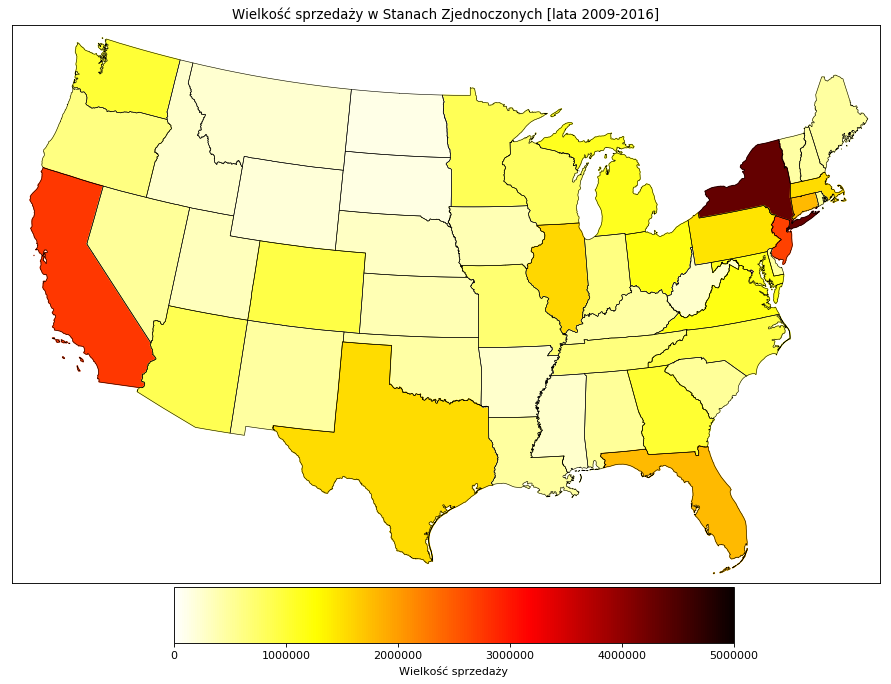

In [40]:
#Tworzymy teraz mapę USA z naniesionymi na nią wartościami sprzedaży dla danych stanów.
plt.figure(figsize=(14, 14), dpi=80)

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

ax = plt.gca() 
fig = plt.gcf()

shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

popdensity = {'Alabama': 54497,
'Alaska': 7227,
'Arizona': 152176,
'Arkansas': 13486,
'California': 1524126,
'Colorado': 169143,
'Connecticut': 642287,
'Delaware': 46116,
'Florida': 641606,
'Georgia': 211410,
'Hawaii': 14724,
'Idaho': 14570,
'Illinois': 496315,
'Indiana': 78162,
'Iowa': 29272,
'Kansas': 29627,
'Kentucky': 43936,
'Louisiana': 45399,
'Maine': 44211,
'Maryland': 261188,
'Massachusetts': 473174,
'Michigan': 255608,
'Minnesota': 142506,
'Mississippi': 13112,
'Missouri': 103786,
'Montana': 12382,
'Nebraska': 17461,
'Nevada': 51956,
'New Hampshire': 47300,
'New Jersey': 1437904,
'New Mexico': 43995,
'New York': 3752692,
'North Carolina': 169756,
'North Dakota': 3273,
'Ohio': 280769,
'Oklahoma': 41486,
'Oregon': 78311,
'Pennsylvania': 435994,
'Rhode Island': 52140,
'South Carolina': 55608,
'South Dakota': 4455,
'Tennessee': 86577,
'Texas': 474915,
'Utah': 23234,
'Vermont': 43401,
'Virginia': 280184,
'Washington': 199741,
'West Virginia': 14188,
'Wisconsin': 122292,
'Wyoming': 9017}

nodata_color = "pink"
colors={}
statenames=[]
patches = []

cmap = plt.cm.hot
cmap_r = plt.cm.hot_r
vmin = 0; vmax = 5000000
norm = Normalize(vmin=vmin, vmax=vmax)
#zmienna mapper do konwersji wartości na kolory
mapper = ScalarMappable(norm=norm, cmap=cmap)

for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename in popdensity:
        pop = popdensity[statename]
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    else:
        statenames.append(statename)
        colors[statename] = nodata_color

for nshape,seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]]) 
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    if (colors[statenames[nshape]] == nodata_color):
        p_no = poly
    ax.add_patch(poly)
    
plt.title('Wielkość sprzedaży w Stanach Zjednoczonych [lata 2009-2016]')

#Tworzymy skalę do wyświetlania pod mapą
cax = fig.add_axes([0.27, 0.2, 0.5, 0.05]) # pozycja
cb = ColorbarBase(cax,cmap=cmap_r,norm=norm,orientation='horizontal')
cb.ax.set_xlabel('Wielkość sprzedaży')
plt.show()

In [41]:
#Tworzymy tabelę łączoną orders_rozsz i customer, połączone za pomocą klucza customerid.
LaczonaTab = orders_rozsz.join(customer, on='customerid')

In [42]:
#Wyświetlamy pięć pierwszych rekordów stworzonej tabeli.
LaczonaTab[:5]

,customerid,campaignid,dzien,miesiac,rok,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname
orderid,,,,,,,,,,,,,,,
1002854,45978,2141,13,10,2009,NEWTON,MA,2459,VI,190.00,3,3,18991234.0,M,LOUIS
1002855,125381,2173,13,10,2009,NEW ROCHELLE,NY,10804,VI,10.00,1,1,36173848.0,M,ANTHONY
1002856,103122,2141,02,06,2011,MIAMI,FL,33137,AE,35.22,2,2,36204911.0,NaN,MERRILL
1002857,130980,2173,14,10,2009,E RUTHERFORD,NJ,7073,AE,10.00,1,1,36173923.0,F,MARIA
1002886,48553,2141,19,11,2010,BALTIMORE,MD,21218,VI,10.00,1,1,19227025.0,NaN,T.


In [43]:
#Grupujemy tabelę na podstawie płci, sprawdzając przy tym kto wydaje więcej pieniędzy. 
pl2 = LaczonaTab[['gender','totalprice']]
pl3 = pl2.groupby(['gender']).sum()
pl4 = pl3.round()
pl5 = pl4.T

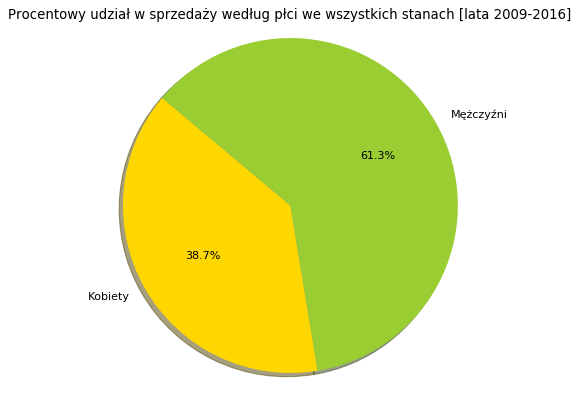

In [44]:
#Następnie tworzymy nowy wykres kołowy, który pokazuje udział poszczególnych płci w sprzedaży biorąc pod uwagę wszystkie stany.
labels = 'Kobiety','Mężczyźni'
sizes = [pl5['F'],pl5['M']]
colors = ['gold', 'yellowgreen']

plt.figure(figsize=(6, 6), dpi=80)
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Procentowy udział w sprzedaży według płci we wszystkich stanach [lata 2009-2016]')
plt.show()

In [45]:
#Łączymy teraz tabelę NowyJork z customer.
LaczonaTab1 = NowyJork.join(customer, on='customerid')

In [46]:
LaczonaTab1[:5]

,customerid,campaignid,dzien,miesiac,rok,city,state,zipcode,paymenttype,totalprice,numorderlines,numunits,householdid,gender,firstname
orderid,,,,,,,,,,,,,,,
1002855,125381,2173,13,10,2009,NEW ROCHELLE,NY,10804,VI,10.00,1,1,36173848.0,M,ANTHONY
1002889,24546,2173,15,10,2009,PLEASANTVILLE,NY,10570,MC,10.00,1,1,19319923.0,M,JOE
1003076,7117,2141,22,11,2010,BROOKLYN,NY,11228,AE,22.05,1,1,18380250.0,NaN,R.
1003493,49066,2141,22,11,2010,STATEN ISLAND,NY,10312,MC,34.90,3,3,20204876.0,M,WILLIAM
1003494,103152,2141,22,11,2010,EAST QUOGUE,NY,11942,MC,36.00,1,2,36177320.0,F,S.


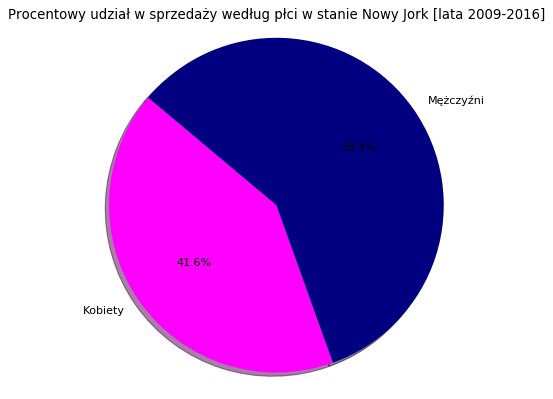

In [47]:
# Na podstawie tabeli sprawdzamy teraz udział mężczyzn i kobiet w stanie Nowy Jork.
pq2 = LaczonaTab1[['gender','totalprice']]
pq3 = pq2.groupby(['gender']).sum()
pq4 = pq3.round()
pq5 = pq4.T

labels = 'Kobiety','Mężczyźni'
sizes = [pq5['F'],pq5['M']]
colors = ['gold', 'yellowgreen']

plt.figure(figsize=(6, 6), dpi=80)
plt.pie(sizes, labels=labels, colors=('magenta','navy'),
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Procentowy udział w sprzedaży według płci w stanie Nowy Jork [lata 2009-2016]')
plt.show()

In [48]:
# W celu dalszej analizy konieczne jest połączenie tabel orders_rozsz i zipcensus.
# Sprawa jest skomplikowana, więc konieczne jest zdublowanie wartości indeksów w obu tabelach i za pomocą nich połączenie ich ze sobą.
pi2 = orders_rozsz[['state','totalprice']]
pi3 = pi2.groupby(['state']).sum()
pi4 = pi3.round()
pi5 = pi4
pi5

a = pi5.index
dane_rozszerzone1 = DataFrame(pi5, columns=['state', 'totalprice'])
dane_rozszerzone1['state']=a
dane_rozszerzone1


,state,totalprice
state,,
.,.,69.0
AA,AA,929.0
AB,AB,4966.0
AE,AE,6451.0
AK,AK,7227.0
AL,AL,54497.0
AP,AP,1074.0
AR,AR,13486.0
AZ,AZ,152176.0


In [49]:
pl2 = zipcensus[['state','population']]
pl3 = pl2.groupby(['state']).sum()
pl4 = pl3.round()
pl5 = pl4
pl5i = pl5.index
dane_rozszerzone = DataFrame(pl5, columns=['state', 'population'])
dane_rozszerzone['state']=pl5i
dane_rozszerzone

,state,population
state,,
AK,AK,624992
AL,AL,4446124
AR,AR,2673534
AZ,AZ,5132229
CA,CA,33864992
CO,CO,4301097
CT,CT,3405565
DC,DC,572059
DE,DE,783600


In [50]:
#LaczonaTab2 to tabela łącząca pomiędzy orders a zipcensus.
LaczonaTab2 = dane_rozszerzone.join(dane_rozszerzone1, on='state',lsuffix="_left")
LaczonaTab2

,state_left,population,state,totalprice
state,,,,
AK,AK,624992,AK,7227.0
AL,AL,4446124,AL,54497.0
AR,AR,2673534,AR,13486.0
AZ,AZ,5132229,AZ,152176.0
CA,CA,33864992,CA,1524126.0
CO,CO,4301097,CO,169143.0
CT,CT,3405565,CT,642287.0
DC,DC,572059,DC,207085.0
DE,DE,783600,DE,46116.0


In [51]:
#Sortujemy rekordy wg populacji.
Posortowana = LaczonaTab2.sort_values(by=['population'], ascending=False)
Posortowana

,state_left,population,state,totalprice
state,,,,
CA,CA,33864992,CA,1524126.0
TX,TX,20844620,TX,474915.0
NY,NY,18975844,NY,3752692.0
FL,FL,15979631,FL,641606.0
IL,IL,12419037,IL,496315.0
PA,PA,12280587,PA,435994.0
OH,OH,11353002,OH,280769.0
MI,MI,9938204,MI,255608.0
NJ,NJ,8413990,NJ,1437904.0


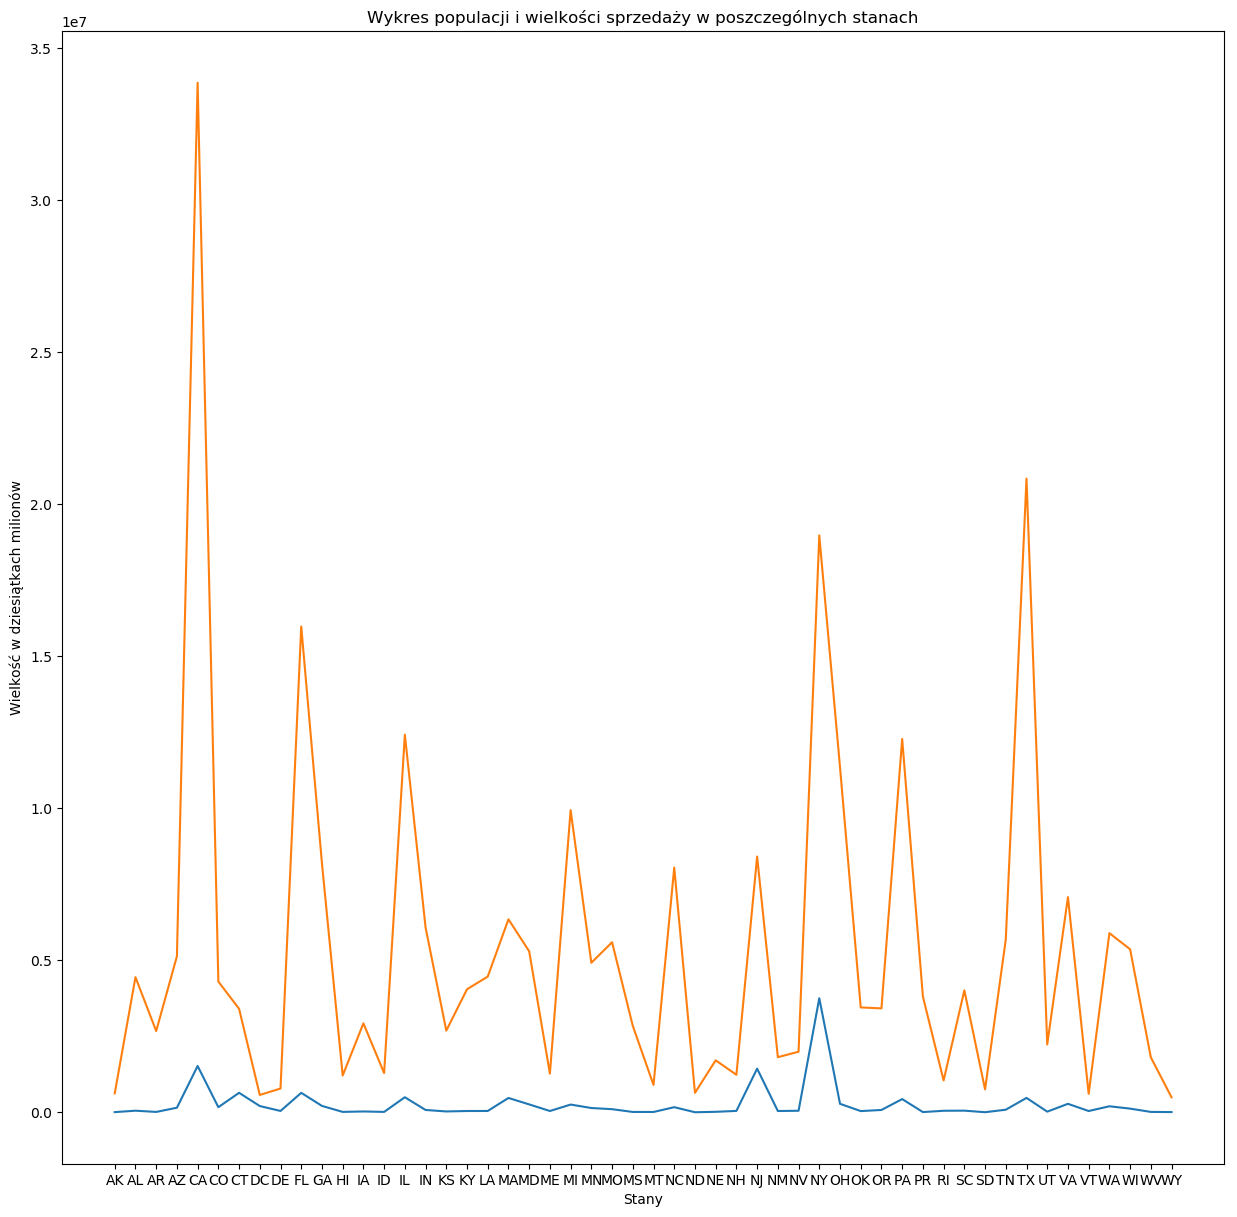

In [52]:
#Tworzymy wykres, na którym widoczne będą: sprzedaż w poszczególnych stanach oraz wielkość populacji.
plt.figure(figsize=(15, 15), dpi=100)
plt.plot(LaczonaTab2['state'],LaczonaTab2['totalprice'])
plt.plot(LaczonaTab2['state'],LaczonaTab2['population'])
plt.title("Wykres populacji i wielkości sprzedaży w poszczególnych stanach")
plt.xlabel("Stany")
plt.ylabel("Wielkość w dziesiątkach milionów")
plt.show() 

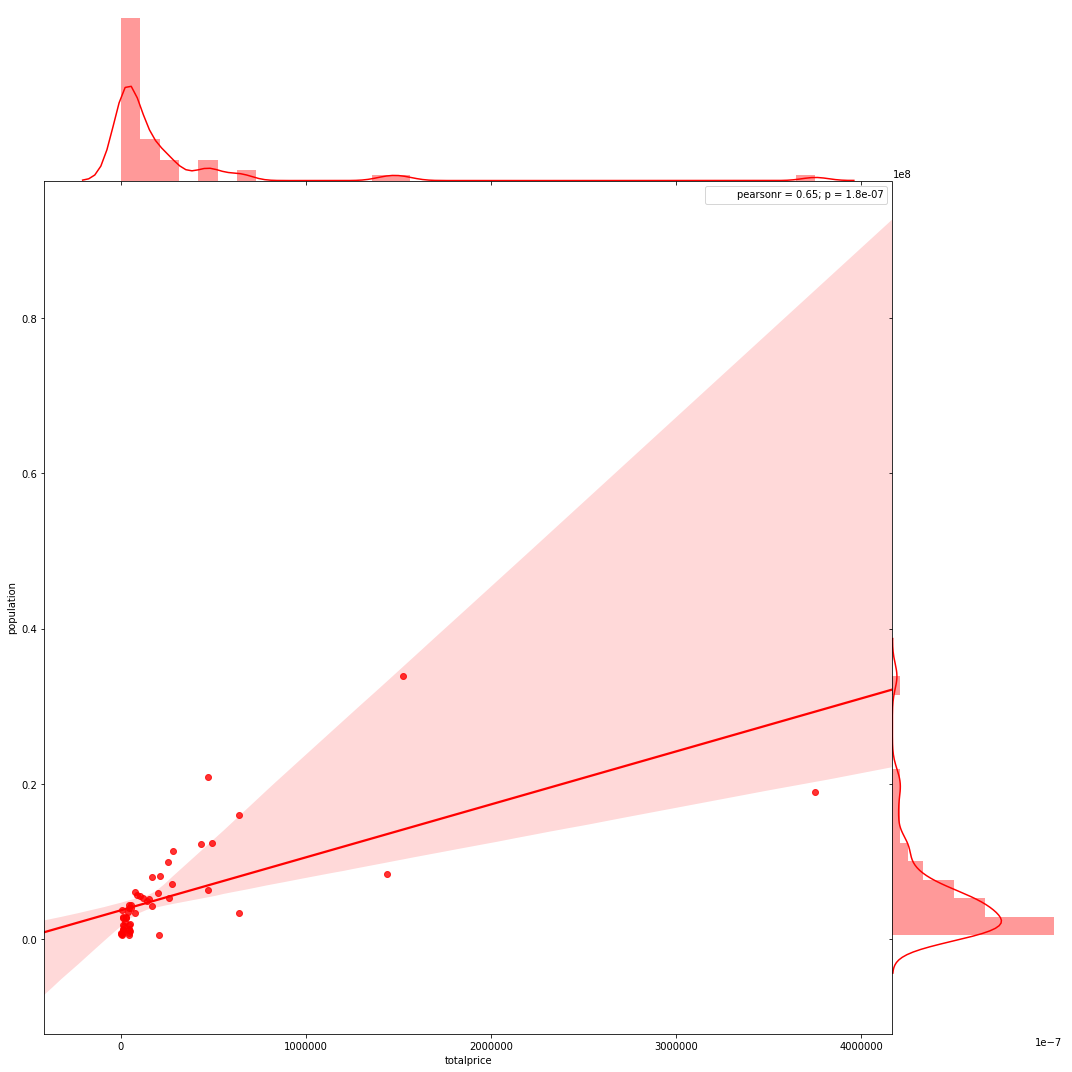

In [53]:
# Teraz sprawdzimy za pomocą wykresu jointplot jak wygląda korelacja Pearsona (czyli ich dopasowanie) między populacją danego stanu, a wielkością sprzedaży.
# Jak widać zmienne są ze sobą dość silnie dodatnio skorelowane (wartość 0.65). Oznacza to, że im większy stan, tym wielkość sprzedaży rośnie.

sns.jointplot(x=LaczonaTab2['totalprice'], y=LaczonaTab2['population'], kind='reg',size=15,space=0, color='red')

plt.show()

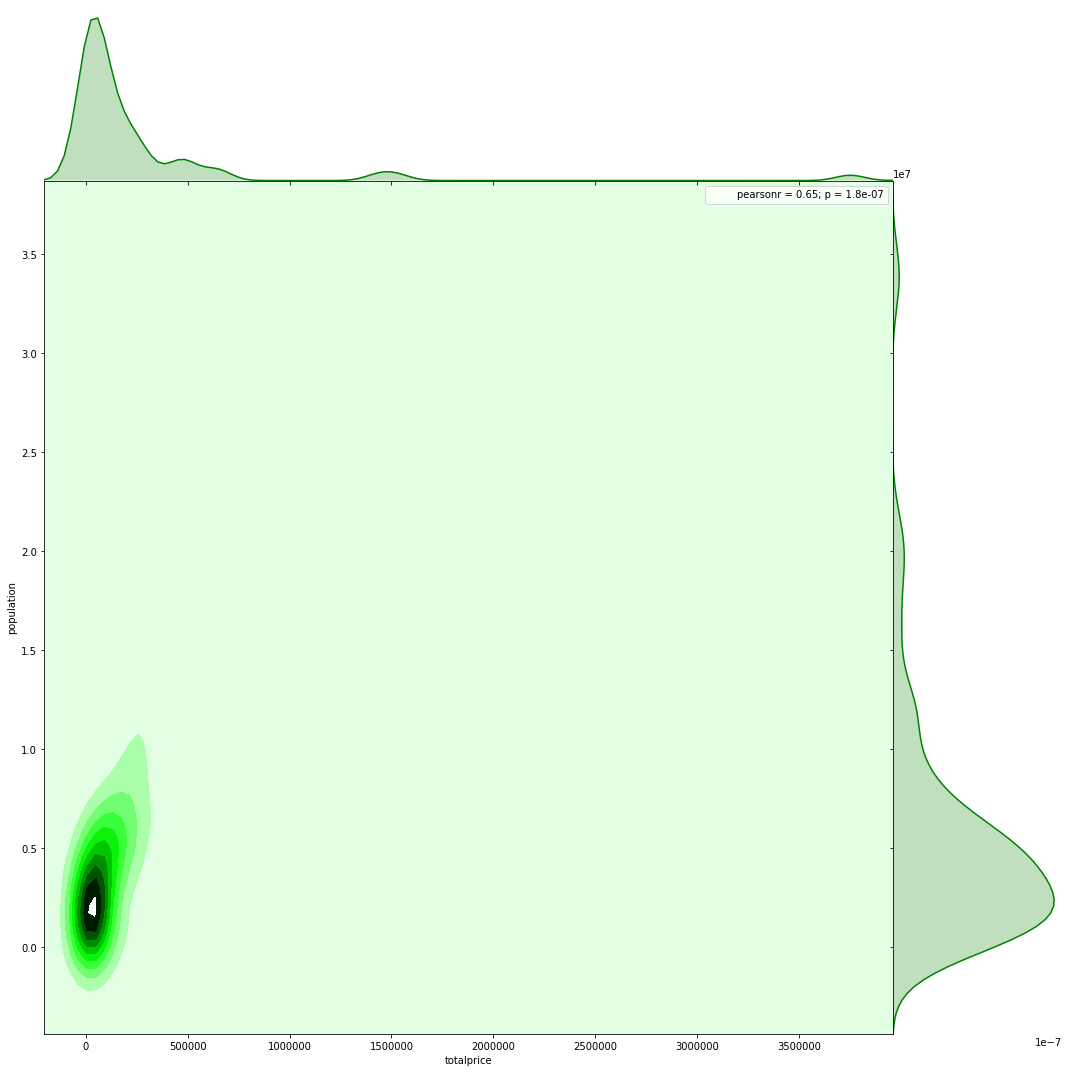

In [54]:
#Następnie badamy miejsce skupienia danych (inny typ wykresu dla korelacji - kde) dla populacji i wielkości sprzedaży. 
#Widać wyraźnie, że wartości nie są przesadnie rozproszone.

sns.jointplot(x=LaczonaTab2['totalprice'], y=LaczonaTab2['population'], kind='kde',size=15,space=0, color='green')

plt.show()


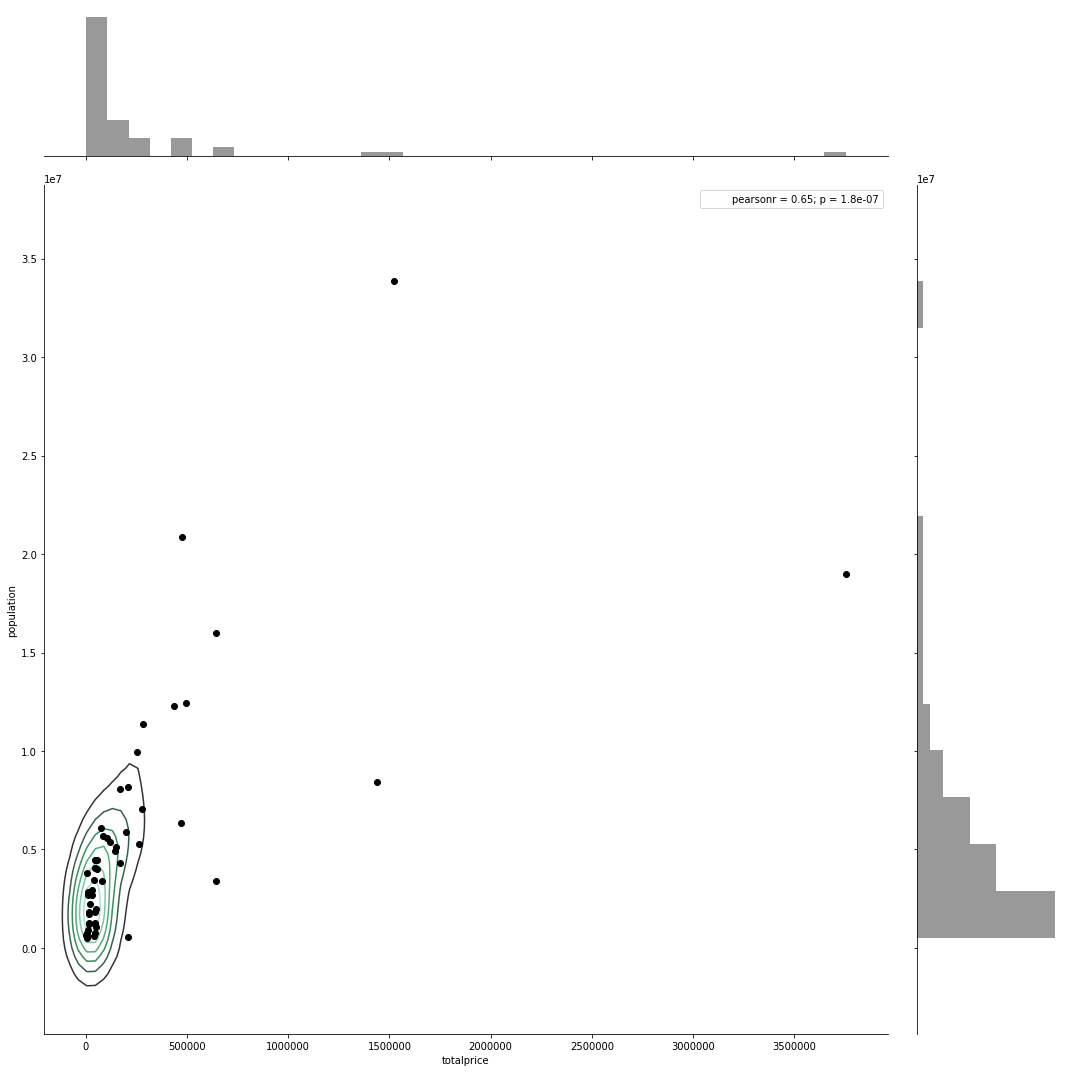

In [55]:
# Jeszcze jeden rodzaj wykresu obrazujący korelację Persona. Jest to jakby pokazanie dokładnych punktów i ich zakresów.
# Na tym wykresie widzimy jak się układają wartości oraz widoczne jest ich zagęszczenie.

g = (sns.jointplot(LaczonaTab2['totalprice'],LaczonaTab2['population'],
                    data=LaczonaTab2, color="k", size=15)
         .plot_joint(sns.kdeplot, zorder=0, n_levels=6))
plt.show()

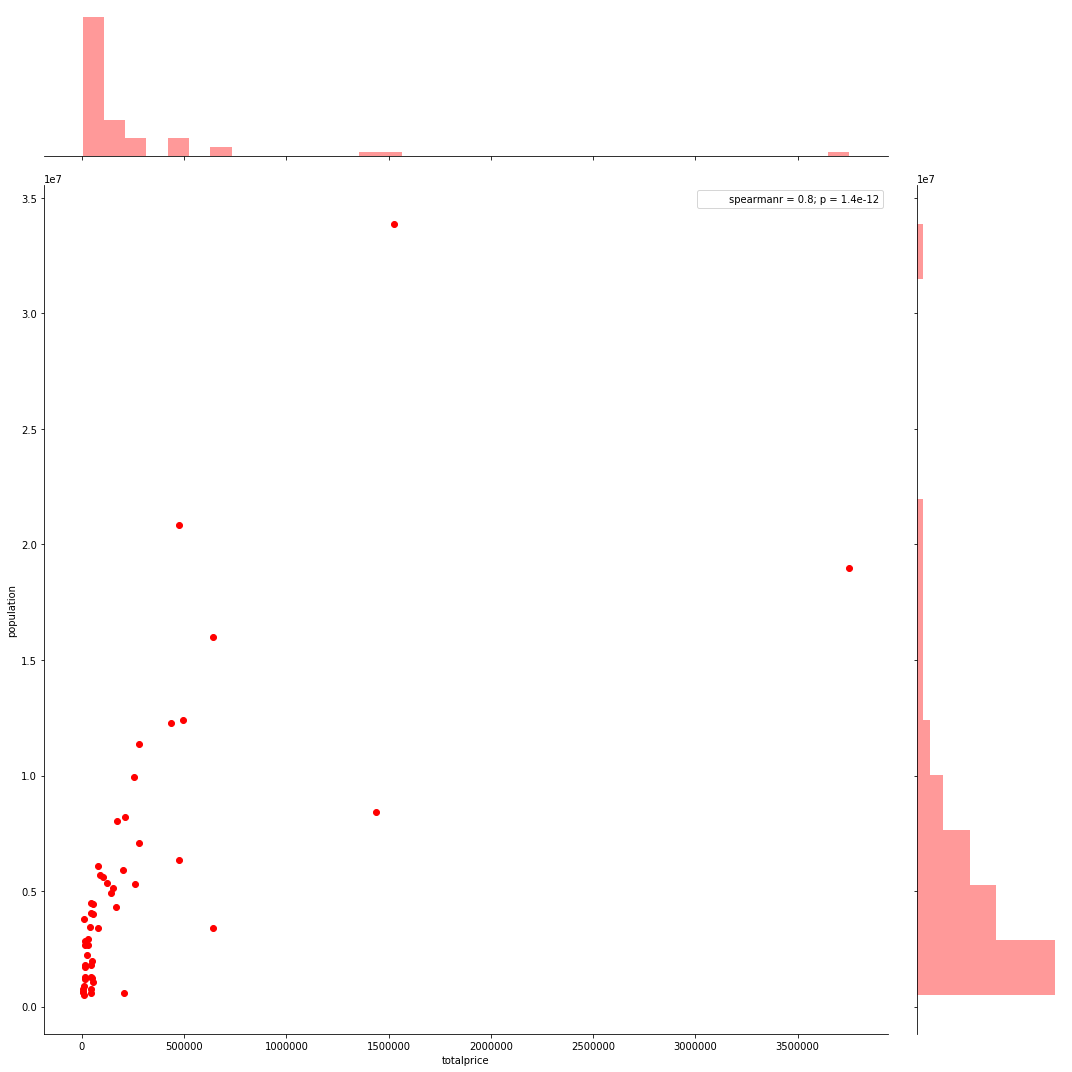

In [56]:
# Importujemy z biblioteki scipy.stats spearmanr,czyli korelację Spearmana, dość podobne narzędzie do korelacji Pearsona, jednak wartości mogą być troszkę inne.
# Wynosi ona 0.8, a więc zmienne są bardzo dobrze do siebie dopasowane dodatnio.

from scipy.stats import spearmanr
g = sns.jointplot(LaczonaTab2['totalprice'], LaczonaTab2['population'], data=LaczonaTab2,
                 stat_func=spearmanr, color="red", size=15)
plt.show()

In [57]:
#Wyświetlenie wszystkich kolumn z tabeli zipcensus
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    print(zipcensus)

        state  population  housingunits  landareameters  waterareameters  \
zipcode                                                                    
601        PR       19143          6715       172731389          1082233   
602        PR       42042         15590        80137374                0   
603        PR       55530         21626        78693011            83181   
604        PR        3923          1245         7785336                0   
606        PR        6449          2272        94870047                0   
...       ...         ...           ...             ...              ...   
99925      AK         955           409       130691717          1496555   
99926      AK        1447           562       337087918         12557132   
99927      AK         120            91        35708345           130757   
99929      AK        2424          1252      2761560103         18788249   
99950      AK          36            23       249350897          1792773   

         la

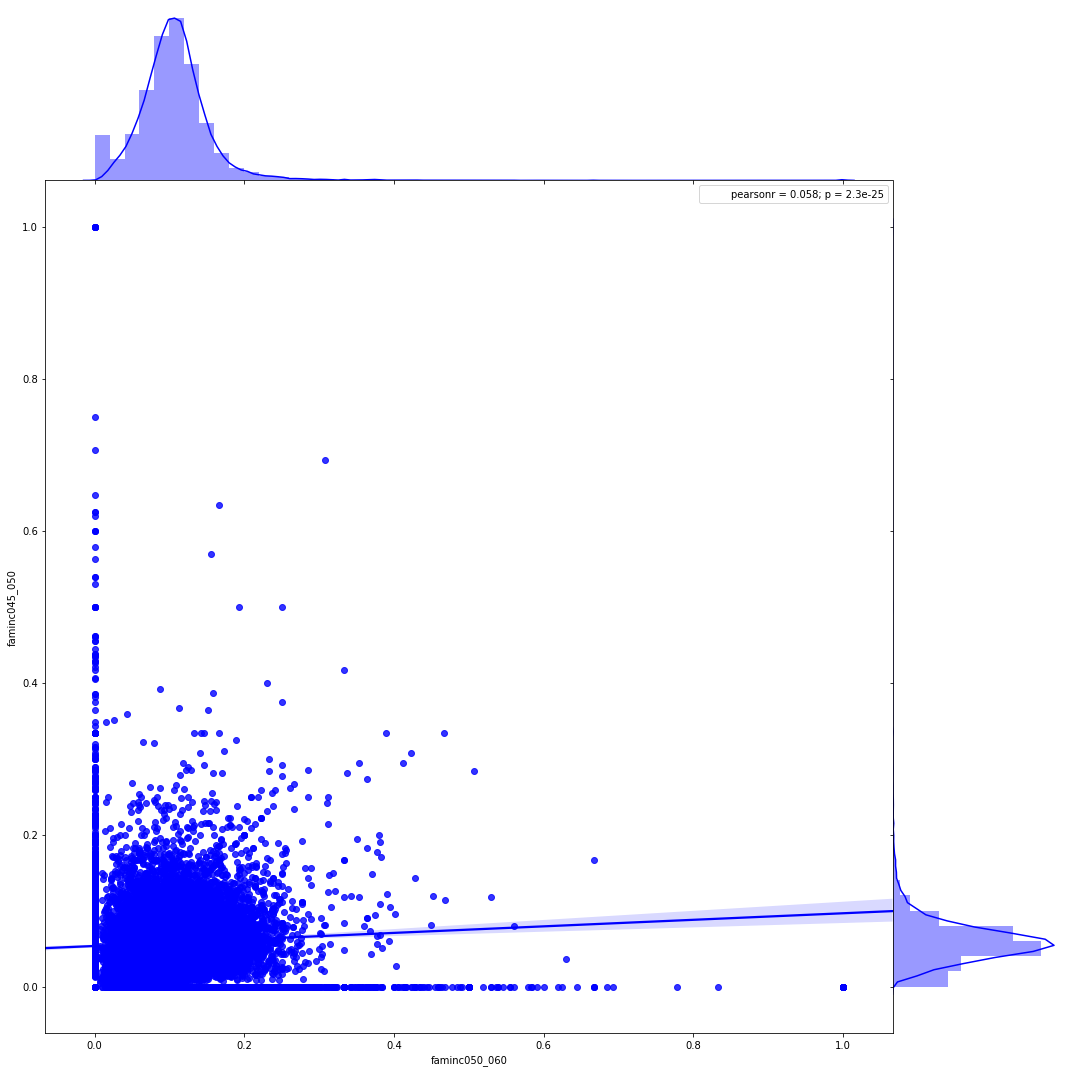

In [58]:
#badanie dwóch zmiennych faminc045_050 oraz faminc050_060 - wskaźniki z tabeli zipcensus
sns.jointplot(x=zipcensus['faminc050_060'], y=zipcensus['faminc045_050'], kind='reg',size=15,space=0, color='blue')

plt.show()

In [59]:
#Tabela skrot będzie zawierała jedynie pierwsze 1500 rekordów tabeli zipcensus, w celu szybkiego zobrazowania machine learning.
#Poniżej przedstawiona będzie także analiza dla wszystkich rekordów (ponad 30 000).
skrot= zipcensus[:1500]

In [60]:
# Przypisujemy wartości zmiennym.
X = skrot["faminc050_060"]
Y = skrot["faminc045_050"]

# Validation_size = % danych, który jest przeznaczony do testowania i automatycznie pozostałe 90% jest przeznaczone do uczenia.
validation_size = 0.10

# Punkt początkowy dla losowania.
seed = 7

# Pocięcie modelu na część testową i tę do uczenia.
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,
                                                                                Y,
                                                                                test_size=validation_size,
                                                                                random_state=seed)
# Przygotowanie zmiennych do wykorzystania w predykcji.
X_train = X_train.values.reshape(len(X_train), 1)
Y_train = np.asarray(Y_train, dtype="|S6")

# Lista modeli, spośród których szukamy tego najlepiej dopasowanego.
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

# Iteracja dla wszystkich modeli
for name, model in models:
    # Metoda selekcji.
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    # Wynik jaki osiągnęła dana metoda podczas walidacji krzyżowej (w nawiasie wszystkie argumenty).
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    # Dodanie wyniku do listy wyników
    results.append(cv_results)
    # Dodanie nazwy do listy nazw
    names.append(name)
    # Utworzenie wiadomości z nazwą metody, średnią i błędem standardowym.
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.042222 (0.015199)


E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing

E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing

E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing

E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing

E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing



LDA: 0.039259 (0.015199)
KNN: 0.022963 (0.012593)
CART: 0.022963 (0.011209)
NB: 0.013333 (0.009827)
SVM: 0.042222 (0.015199)


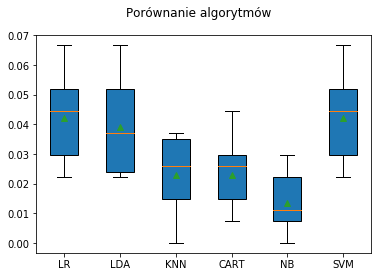

In [61]:
# Porównujemy teraz wyniki na wykresie, w celu wyboru najbardziej odpowiedniego.
# Utworzenie nowej figury do wykresu
fig = plt.figure()
fig.suptitle(u'Porównanie algorytmów')
# Oś, do której dodaje się figurę w postaci podwykresu o wymiarach 1,1,1
ax = fig.add_subplot(111)
# Tworzenie wykresu boxplot i jego atrybutów.
plt.boxplot(results,patch_artist=True,showmeans=True)
# Przypisanie do osi x nazw.
ax.set_xticklabels(names)
plt.show()

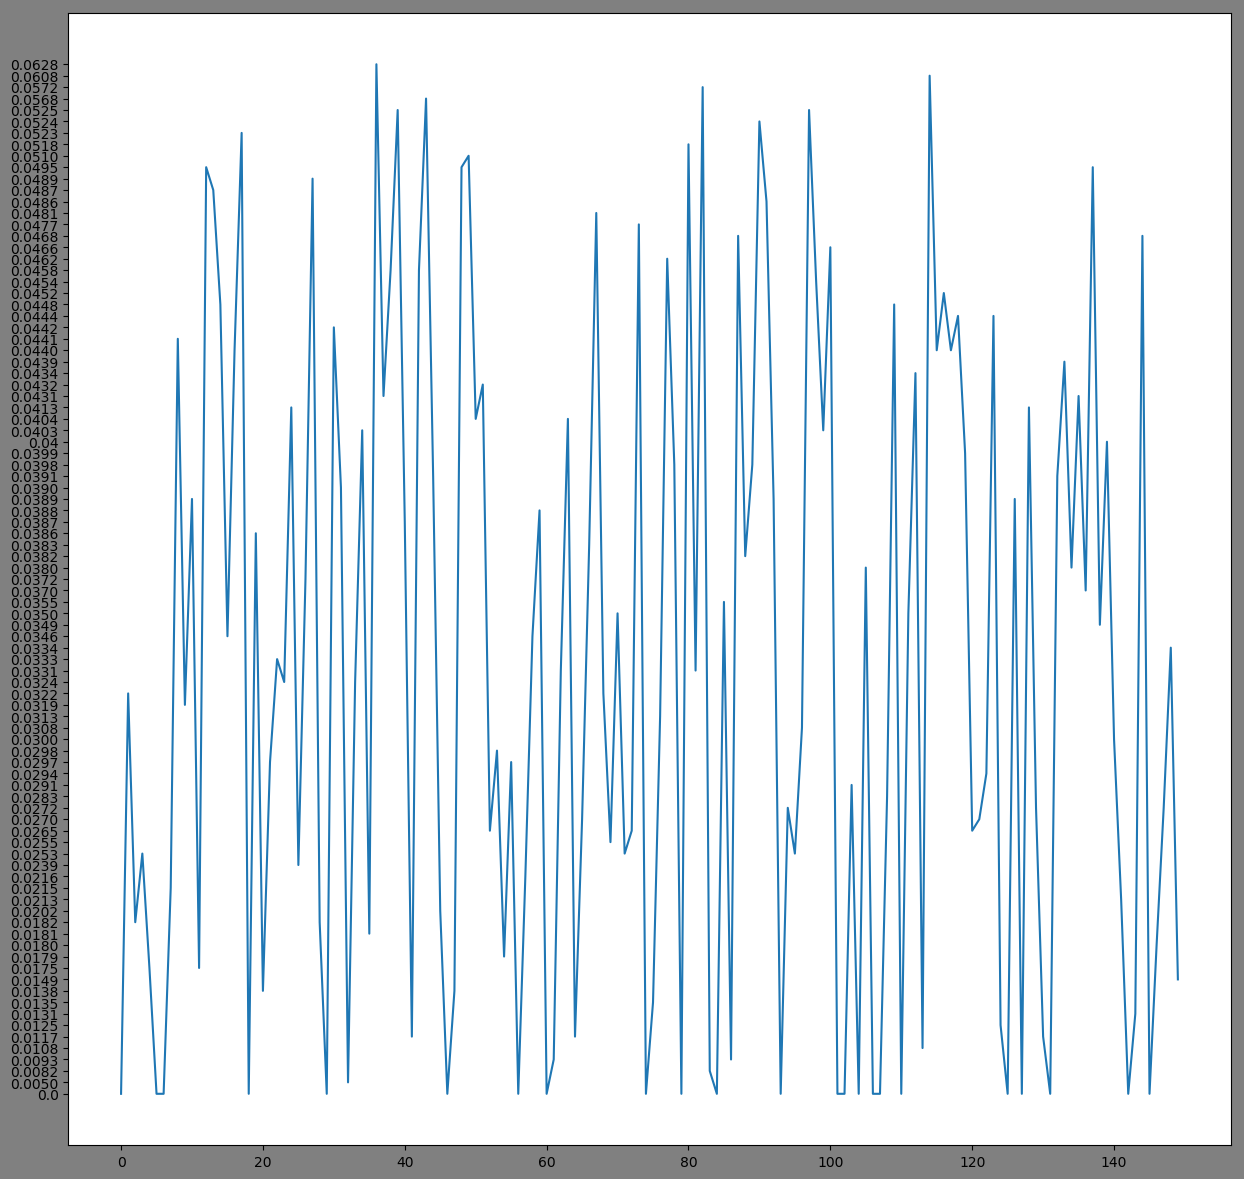

In [62]:
# KNN to metoda k - najbliższych sąsiadów.
knn = KNeighborsClassifier()
# Dopasowanie zmiennych X_train, Y_train.
knn.fit(X_train, Y_train)
# Przewidywane wartości dla podanych X.
predictions = knn.predict(X_validation.values.reshape(len(X_validation), 1))
plt.figure(figsize=(15, 15), dpi=100, facecolor="gray")
plt.plot(predictions)
plt.show()

In [63]:
#Tabela skrot 2 wyświetla wartości od 1350 indeksu. 
#Dzieje się tak, ponieważ możemy dzięki temu porównać otrzymane wartości na powyższym wykresie z wartościami rzeczywistymi.
#Jest to 10% danych testowych.
skrot2=DataFrame(skrot, columns=['faminc050_060','faminc045_050'])
skrot2[1350:]

,faminc050_060,faminc045_050
zipcode,,
5065,0.136943,0.124204
5067,0.150000,0.066667
5068,0.125495,0.067371
5069,0.101523,0.096447
5070,0.130769,0.038462
5071,0.222222,0.066667
5072,0.152778,0.118056
5073,0.113636,0.204545
5074,0.000000,0.000000


In [ ]:
#Teraz przeprowadzimy pełną predykcję dla wszystkich rekordów z tabeli zipcensus.
#Przypisujemy wartości zmiennym.
X = zipcensus["faminc050_060"]
Y = zipcensus["faminc045_050"]

# Validation_size = % danych, który jest przeznaczony do testowania i automatycznie pozostałe 90% jest przeznaczone do uczenia.
validation_size = 0.10

# Punkt początkowy dla losowania.
seed = 7

# Pocięcie modelu na część testową i tę do uczenia.
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,
                                                                                Y,
                                                                                test_size=validation_size,
                                                                                random_state=seed)
# Przygotowanie zmiennych do wykorzystania w predykcji.
X_train = X_train.values.reshape(len(X_train), 1)
Y_train = np.asarray(Y_train, dtype="|S6")

# Lista modeli, spośród których szukamy tego najlepiej dopasowanego.
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []

# Iteracja dla wszystkich modeli
for name, model in models:
    # Metoda selekcji.
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    # Wynik jaki osiągnęła dana metoda podczas walidacji krzyżowej (w nawiasie wszystkie argumenty).
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    # Dodanie wyniku do listy wyników
    results.append(cv_results)
    # Dodanie nazwy do listy nazw
    names.append(name)
    # Utworzenie wiadomości z nazwą metody, średnią i błędem standardowym.
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.085766 (0.004604)


E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing

E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing

E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing

E:\Program Files\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning:

The priors do not sum to 1. Renormalizing



LDA: 0.080980 (0.004597)
KNN: 0.068079 (0.002920)
CART: 0.071790 (0.003697)
NB: 0.039779 (0.004033)


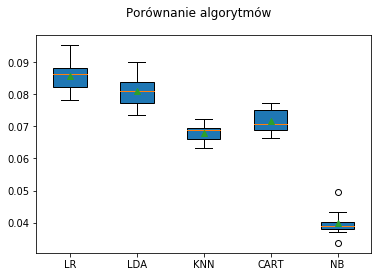

In [66]:
# Porównujemy teraz wyniki na wykresie, w celu wyboru najbardziej odpowiedniego.
# Widać, że wraz z większą ilością danych % prawidłowego przewidywania jest znacznie większy.
# Utworzenie nowej figury do wykresu
fig = plt.figure()
fig.suptitle(u'Porównanie algorytmów')
# Oś, do której dodaje się figurę w postaci podwykresu o wymiarach 1,1,1
ax = fig.add_subplot(111)
# Tworzenie wykresu boxplot i jego atrybutów.
plt.boxplot(results,patch_artist=True,showmeans=True)
# Przypisanie do osi x nazw.
ax.set_xticklabels(names)
plt.show()

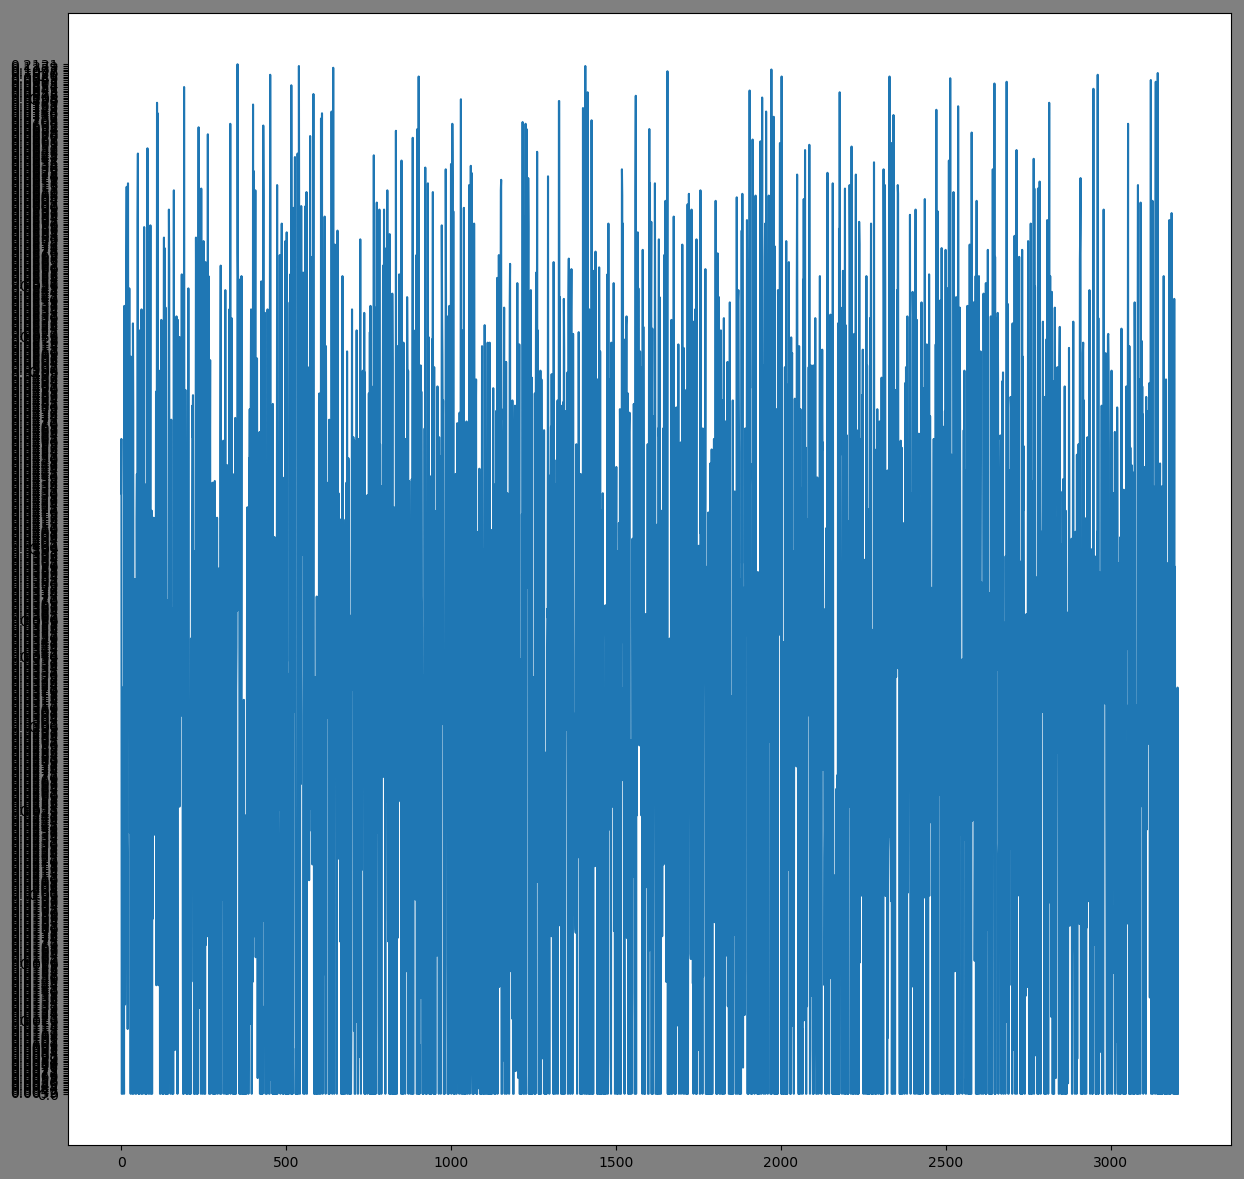

In [65]:
#Przedstawiamy teraz wykres predykcji dla pełnej tabeli zipcensus, niestety z powodu duzej liczby rekordów nie jest zbyt czytelny.
# KNN to metoda k - najbliższych sąsiadów.
knn = KNeighborsClassifier()
# Dopasowanie zmiennych X_train, Y_train.
knn.fit(X_train, Y_train)
# Przewidywane wartości dla podanych X.
predictions = knn.predict(X_validation.values.reshape(len(X_validation), 1))
plt.figure(figsize=(15, 15), dpi=100, facecolor="gray")
plt.plot(predictions)
plt.show()